# Latar Belakang

Terdapat sebuah perusahaan bernama **SparksHUB**. SparksHUB adalah perusahaan **SaaS (Software as a Service)** yang menyediakan perangkat lunak berbasis *cloud* bagi perusahaan-perusahaan B2B. Dengan solusi ini, pelanggan dapat menggunakan perangkat lunak untuk kebutuhan *Sales & Marketing* tanpa perlu melakukan instalasi di tempat. Produk SparksHUB seperti Marketing Suite dan FinanceHub dirancang untuk memudahkan pelanggan dalam mengelola kegiatan *Sales & Marketing* perusahaan mereka.

**Sebagai sebuah perusahaan, SparksHUB tentunya mengalami untung dan rugi dari segi pendapatan (profitabilitas)**. Selama ini SparksHUB telah mendokumentasikan setiap transaksi yang mencakup rincian lokasi pelanggan, industri yang dilayani, segmen pelanggan, produk yang dibeli, diskon yang diberikan, serta profit atau kerugian dari tiap transaksi tersebut.

Di tengah persaingan pasar yang ketat, kemajuan teknologi, dan kebutuhan pelanggan yang berkembang, SparksHUB perlu memastikan bahwa setiap produk dan strategi penjualan berkontribusi pada peningkatan pendapatan. **Sales & Marketing Team** bertanggung jawab untuk mencapai target pendapatan dan membutuhkan wawasan strategis guna **mengoptimalkan profitabilitas**.

Oleh karena itu, Sales & Marketing Team membutuhkan pendekatan yang lebih efektif untuk memahami pola penjualan, profitabilitas tiap segmen pelanggan, serta efektivitas strategi diskon. Tujuannya adalah agar tim penjualan dan pemasaran dapat mengambil tindakan strategis berdasarkan *insight* yang diperoleh dari data.

**Maka dari itu, Head of Sales & Marketing Team di SparksHUB, meminta seorang Data Analyst untuk  menganalisis data yang mereka miliki agar selanjutnya dapat membuat kebijakan yang tepat sehingga mengurangi kerugian, meningkatkan pendapatan serta memperkuat posisi pasar. Terutama pada segmen dan produk dengan kontribusi tertinggi bagi perusahaan.**

# Pernyataan Masalah

**Pernyataan Masalah**

Untuk memastikan bahwa setiap produk dan strategi penjualan yang dilakukan berkontribusi pada peningkatan pendapatan dibanding kerugian. Maka dari itu, sebagai seorang *Data Analyst*, kita akan mencoba menyimpulkan dengan menjawab pertanyaan berikut:

**Goals**

1. **Produk** SparksHUB mana yang memberikan kontribusi tertinggi terhadap profit perusahaan, dan produk mana yang perlu peningkatan agar lebih menguntungkan?

2. Seberapa efektif strategi **diskon** saat ini dalam meningkatkan volume penjualan tanpa mengorbankan profitabilitas? Apakah ada nominal diskon tertentu yang optimal bagi perusahaan?

3. Berdasarkan **segmen** pelanggan (SMB, Strategis, Enterprise) mana yang memberikan kontribusi terbesar terhadap pendapatan? Apa strategi yang dapat meningkatkan nilai dari setiap segmen ini?

4. Berdasarkan demografi pelanggan, **kapan dan di wilayah** mana penjualan serta profit SparksHUB mencapai puncaknya, dan apakah terdapat pola musiman yang dapat dioptimalkan untuk perencanaan pemasaran ke depan?

5. **Industri** apa yang paling menguntungkan bagi SparksHUB? Apakah ada sektor yang memiliki potensi besar untuk ekspansi atau fokus tambahan dalam strategi pemasaran?

**Tujuan Goals**

Mendapatkan  wawasan strategis untuk menghasilkan kebijakan yang tepat sehingga mengoptimalkan pendapatan.

# Informasi Data

Untuk menjawab pertanyaan di atas, kita akan menganalisa dataset SparksHUB yang sudah disediakan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1dlpJfgvs8P_IyXqWB4WrNwk91fx0XAzU).


## Import Library

In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro,ttest_ind,mannwhitneyu, kruskal

import warnings
warnings.filterwarnings("ignore")

## Data Master

Di dataset yang dimiliki SparksHUB ini, tiap baris merupakan data transaksi dari tiap kolom yang mempresentasikan data order dan pelanggan.

 Detail kolom nya:

1. Row ID: *A unique identifier* di tiap transaksi
2. Order ID: *A unique identifier* di tiap order
3. Order Date: Tanggal order dibuat
4. Date Key: Tanggal Order dalam bentuk data numerik dari (YYYMMDD)
5. Contact Name: Nama dari representasi perusahaan yang melakukan order
6. Country: Negara dimana order dilakukan
7. City: Kota dimana order dilakukan
8. Region: Wilayah mana order dilakukan
9. Sub-Region: Sub-Wilayah mana order dilakukan
10. Customer: Nama Perusahaan yang melakukan order
11. Customer ID: *A unique identifier* tiap kustomer
12. Industry: Bidang industri yang konsumen lakukan
13. Segment: Segmen Pelanggan
14. Product: Produk SparksHUB yang dipesan
15. License: *License Key* untuk produk
16. Sales: Jumlah total penjualan untuk transaksi
17. Quantity: Jumlah total item dalam transaski
18. Discount: Diskon yang berlaku pada transaksi
19. Profit: Keuntungan dari transaksi

Nama kolom dari dataset ini sudah tepat dan dapat dimengerti sesuai dengan tujuan nya, jadi tidak perlu di *rename* lagi.

Isi tiap kolom yaitu baris. Berikut 5 baris teratas dan terbawah dari dataset:

In [2]:
data_master=pd.read_csv('SaaS-Sales.csv')
display(data_master.head(),data_master.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


# Data Understanding & Data Cleaning

Pertama, kita perlu mengenal terlebih dahulu dataset ini dalam tahapan *data understanding*. Di proses ini, kita akan cek anomali apa saja yang terdapat di dalam dataset dan akan ditangani dalam tahapan *data cleaning*. Setiap penanganan yang dilakukan, disertai dengan penjelasan langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

## Data Understanding

### Informasi Umum Data

In [3]:
# Melihat data secara umum
data_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [1404]:
# Melihat data numerik dan data objek secara statistik
display(data_master.describe(), data_master.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


### Detail isi data

In [4]:
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in data_master.columns :
    listItem.append( [col, data_master[col].nunique(), data_master[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 202

### Kesimpulan

* Dataset SparksHUB ('SaaS-Sales.csv') memiliki 9994 baris dan 19 kolom
* Tidak ada missing value di tiap kolom. Missing Value biasanya ditulis NaN. Harap diingat, 0 bukan lah missing value.
* Kolom `Row ID `yang berisi ID Unik tiap transaksi, tetap dipertahankan karena menjadi ID Unik tiap transaksi walau `Order Date` dan `Order ID` nya sama.
* Kolom `Order Date` yang berisi tanggal order dibuat, dapat dihapus saja karena sudah di representasikan oleh kolom lain dalam bentuk int yaitu kolom `Date Key`
* Kolom `Date Key` yang merupakan tanggal format YYYYMMDD dengan tipe int perlu dikonversi menjadi datetime agar lebih konsisten dan aman serta memudahkan dalam melakukan analisis. Selain itu perlu di cek juga apakah angka di Bulan (MM) antara 1-12 dan Tanggal (DD) antara 30,31 dan 28 khusus Februari.
* Kolom `Contact Name`, `Country`, `City`, `Region`, `Subregion`, `Customer`, `Industry`, `Segment`, dan `Product` dengan nilai unik 5% - 10% dari total data (500 - 1000), dapat kita ubah tipe data nya dari Object ke Category agar menghemat memori dan mempercepat operasi analitik.
* Kolom `Region` yang merupakan wilayah oder dilakukan, memiliki 3 data unik yaitu:
    - EMEA (Europe, Middle East, and Africa)
        Meliputi Eropa, Timur Tengah, dan Afrika. Wilayah ini biasanya mencakup berbagai negara di Eropa, negara-negara Arab di Timur Tengah, dan negara-negara di benua Afrika.
    - AMER (America)
        Mengacu pada seluruh Benua Amerika, termasuk Amerika Utara, Amerika Tengah, dan Amerika Selatan. AMER sering dibagi lagi menjadi NA (North America) untuk Amerika Serikat dan Kanada, serta LATAM (Latin America) untuk negara-negara di Amerika Tengah dan Selatan.
    - APJ (Asia Pacific and Japan)
        Mencakup wilayah Asia Pasifik dan Jepang. Ini termasuk negara-negara Asia Timur, Asia Tenggara, Oseania, dan Jepang.
* Kolom `Subregion` yang merupakan sub-wilayah order dilakukan, memiliki 12 data unik yaitu:
    - UKIR (United Kingdom dan Ireland)
    - NAMER (North America)
    - EU-WEST (Western Europe)
    - NOR (Nordics)
    - JAPN (Japan)
    - EU (Europe)
    - MEA (Middle East and Africa)
    - LATAM (Latin America)
    - ANZ (Australia dan New Zealand)
    - APAC (Asia Pacific)
    - IND (India)
    - EU-EAST (Eastern Europe)
* Kolom `Profit` menunjukkan numerikal yang positif dan negatif. Positif artinya profit keuntungan sedangkan negatif artinya kerugian. Disini diperlukan kolom baru bernama `Profit Category ` dengan value 'Keuntungan' untuk nilai positif dan 'Kerugian' untuk nilai negatif agar memudahkan dalam melakukan analisis per kategori.
* Kolom lain nya telah sesuai dengan isi, tipe dan tujuan data nya, hanya saja tetap diperlukan analisis lanjut, terutama kolom yang berhubungan satu sama lain untuk mengecek *Anomalies* nya di tahap Data Cleaning.

## Data Cleaning

### Perbaiki Format Kolom

Sesuai kesimpulan di Data Understanding, disini kita akan memperbaiki kolom tanggal dengan menghapus kolom `Order Date`

In [5]:
# Menghapus kolom Order Date
data_master = data_master.drop(columns=['Order Date'])


Sesuai kesimpulan di Data Understanding section, selanjutnya kita akan mengubah kolom  `Contact Name`, `Country`, `City`, `Region`, `Subregion`, `Customer`, `Industry`, `Segment`, dan `Product` dari tipe data Object ke Category agar menghemat memori dan mempercepat operasi analitik.

In [6]:
colToStrings = ['Contact Name','Country','City','Region','Subregion','Customer','Industry', 'Segment', 'Product']
data_master[colToStrings] = data_master[colToStrings].apply(lambda x : x.astype('category'))

Setelah menghapus kolom yang tidak relevan dan mengubah tipe data beberapa kolom yang lebih tepat, kita perlu melakukan pengecekan ulang apakah sudah sesuai dengan yang diinginkan.

In [7]:
data_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Row ID        9994 non-null   int64   
 1   Order ID      9994 non-null   object  
 2   Date Key      9994 non-null   int64   
 3   Contact Name  9994 non-null   category
 4   Country       9994 non-null   category
 5   City          9994 non-null   category
 6   Region        9994 non-null   category
 7   Subregion     9994 non-null   category
 8   Customer      9994 non-null   category
 9   Customer ID   9994 non-null   int64   
 10  Industry      9994 non-null   category
 11  Segment       9994 non-null   category
 12  Product       9994 non-null   category
 13  License       9994 non-null   object  
 14  Sales         9994 non-null   float64 
 15  Quantity      9994 non-null   int64   
 16  Discount      9994 non-null   float64 
 17  Profit        9994 non-null   float64 
dtypes: categ

### Kolom Profit

Sesuai dengan kesimpulan sebelumnya, kita akan membuat kolom baru untuk pengkategorian data di kolom `Profit`. Data yang positif akan berlabel Keuntungan, data yang negatif akan berlabel Kerugian.

In [6]:
# Buat kolom baru 'Kategori Profit' berdasarkan nilai di kolom 'Profit'
data_master['Kategori Profit'] = np.where(data_master['Profit'] > 0, 'Keuntungan', 'Kerugian')

# Tampilkan hasil
data_master

,Row ID,Order ID,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Kategori Profit
0,1,EMEA-2022-152156,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,Keuntungan
1,2,EMEA-2022-152156,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,Keuntungan
2,3,AMER-2022-138688,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,Keuntungan
3,4,EMEA-2021-108966,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,Kerugian
4,5,EMEA-2021-108966,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,Keuntungan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028,Keuntungan
9990,9991,AMER-2023-121258,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332,Keuntungan
9991,9992,AMER-2023-121258,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932,Keuntungan
9992,9993,AMER-2023-121258,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200,Keuntungan


### Missing Value

In [7]:
# persentase missing value di tiap kolom
data_master.isna().sum()/data_master.shape[0]*100

Row ID             0.0
Order ID           0.0
Date Key           0.0
Contact Name       0.0
Country            0.0
City               0.0
Region             0.0
Subregion          0.0
Customer           0.0
Customer ID        0.0
Industry           0.0
Segment            0.0
Product            0.0
License            0.0
Sales              0.0
Quantity           0.0
Discount           0.0
Profit             0.0
Kategori Profit    0.0
dtype: float64

<Axes: >

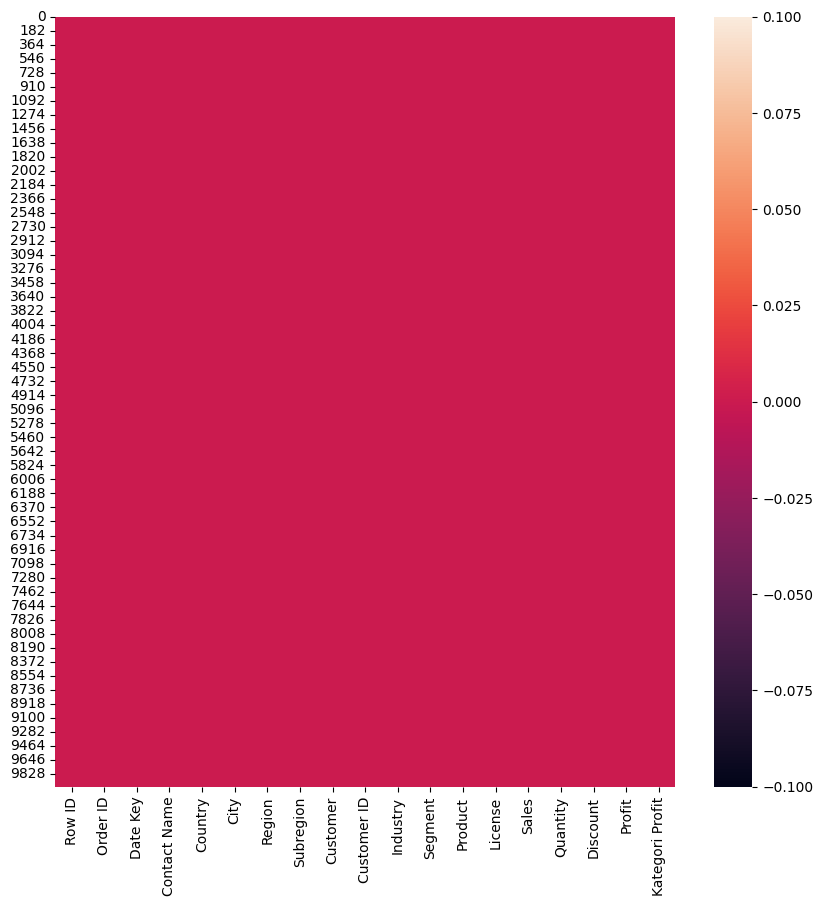

In [8]:
# Sebaran missing value di dalam data dalam bentuk visual
plt.figure(figsize=(10,10))
sns.heatmap(data_master[['Row ID','Order ID','Date Key','Contact Name','Country','City','Region', 'Subregion', 
                         'Customer', 'Customer ID', 'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity', 'Discount', 'Profit', 'Kategori Profit']].isna())

Secara garis besar dan visual, tetap tidak ada Missing Value yang ditemukan. Jadi kita tidak perlu melakukan action di sini. Namun, berikut 2 cara untuk menangani Missing Value:

* Jika Missing Value di kolom <10% total, maka row yang terdapat Missing Value dapat dihapus karena data nya sedikit
* Jika Missing Value ada diantara 10% - 30%, disi dengan nilai rata-rata (median/ mean) berdasarkan standar deviasi (tes menggunakan kolom yang numerik)
* Jika Missing Value di kolom >30%, hapus kolom tersebut karena Missing Value nya sudah terlalu banyak jadi data di kolom tersebut tidak berfungsi sebagaimana mestinya.

### Duplicate Data

In [9]:
# Cek jika ada duplikat di seluruh kolom dataset
duplikat = data_master.duplicated()

# Hitung jumlah duplikat
jumlah_duplikat = duplikat.sum()

# Tampilkan hasil
print(f"Jumlah data duplikat: {jumlah_duplikat}")

# Jika ada duplikat dan Anda ingin menghapusnya, gunakan drop_duplicates
if jumlah_duplikat > 0:
    data_master = data_master.drop_duplicates()
    print("Data duplikat telah dihapus.")
else:
    print("Tidak ada data duplikat yang ditemukan.")

Jumlah data duplikat: 0
Tidak ada data duplikat yang ditemukan.


Tidak ada data duplikat yang ditemukan. Namun, ada beberapa kolom yang berhubungan, disini kita akan mengecek kolom-kolom tersebut untuk memastikan semua kolom yang berhubungan, terintegrasi dengan baik.

### Cek Relational Integrity

Sekarang, mari kita lihat dan tangani kolom-kolom yang berhubungan satu sama lain (berdasarkan domain knowledge) untuk mengecek tiap-tiap anomali secara lebih jauh.  

#### `Customer` dan `Customer ID`

`Customer ID` adalah ID Unik tiap `Customer`. Maka dari itu, kita perlu memastikan bahwa setiap entri `Customer ID` memiliki pasangan yang sesuai dalam kolom `Customer`.

In [10]:
# Memastikan setiap Customer ID di data terdapat di kolom Customer
missing_customers = data_master[~data_master['Customer ID'].isin(data_master['Customer ID'])]

if missing_customers.empty:
    print("Semua Customer ID di data memiliki pasangan di kolom 'Customer'")
else:
    print("Terdapat Customer ID yang tidak memiliki pasangan di kolom 'Customer'. Yaitu:")
    print(missing_customers[['Customer ID']].drop_duplicates())

Semua Customer ID di data memiliki pasangan di kolom 'Customer'


#### `Date Key`

`Date Key` merupakan tipe data INT berformat YYYYMMDD dari `Order Date`. Disini kita perlu memastikan tidak ada anomali, misalnya data dengan nilai seperti 20231301 (bulan ke-13) atau 20240230 (tanggal yang tidak ada).

In [11]:
def is_valid_date_key(date_key):
    try:
        # Convert jadi string agar bisa diproses
        date_str = str(date_key)

        # Validasi panjang string (harus 8 karakter)
        if len(date_str) != 8:
            print(f"Panjang tidak sesuai: {date_str}")  # Debugging jika panjang string tidak 8
            return False
        
        year, month, day = int(date_str[:4]), int(date_str[4:6]), int(date_str[6:])
        
        # Objek datetime untuk memverifikasi validitas tanggal
        # Menggunakan datetime.strptime untuk parsing string
        try:
            datetime.datetime.strptime(date_str, "%Y%m%d")
            return True  # Jika parsing berhasil, tanggal valid
        except ValueError:
            print(f"Tanggal tidak valid: {date_str}")  # Debugging jika parsing gagal
            return False
        
    except Exception as e:
        print(f"Error dalam memproses {date_key}: {e}")
        return False

print(type(data_master))
# Apply validate function :)
data_master['Valid Date Key'] = data_master['Date Key'].apply(is_valid_date_key)

# Print
invalid_dates = data_master[~data_master['Valid Date Key']]  # Ambil row saat 'Valid Date Key' False
if not invalid_dates.empty:
    print("Terdapat anomali di kolom 'Date Key':")
else:
    print("Semua nilai di kolom 'Date Key' valid.")

<class 'pandas.core.frame.DataFrame'>
Semua nilai di kolom 'Date Key' valid.


In [12]:
# Menghapus kolom test Date Key
data_master = data_master.drop('Valid Date Key', axis=1)

#### `Product` dan `License`

Dari gambaran umum data, kolom `Product` memiliki 14 data unik dan License adalah ID unik untuk setiap lisensi produk tersebut. Maka disini kita akan memastikan ada kesesuaian/relevansi dengan kolom `Product`.

In [13]:
# Memeriksa jumlah produk unik
num_unique_products = data_master['Product'].nunique()
if num_unique_products == 14:
    print(f"Jumlah produk unik benar: {num_unique_products}")
else:
    print(f"Jumlah produk unik tidak sesuai, ditemukan {num_unique_products} produk unik.")

# Memeriksa apakah setiap lisensi unik hanya terkait dengan satu produk
license_product_check = data_master.groupby('License')['Product'].nunique()

# Mendapatkan lisensi yang terkait dengan lebih dari satu produk
anomalies = license_product_check[license_product_check > 1]

if not anomalies.empty:
    print("Terdapat lisensi yang terkait dengan lebih dari satu produk:")
    print(anomalies)
else:
    print("Semua lisensi unik terkait dengan satu produk yang relevan.")

Jumlah produk unik benar: 14
Semua lisensi unik terkait dengan satu produk yang relevan.


#### `Country` dan `City`

Di kolom `Country` dan `City` ini karena terkait, kita akan memastikan bahwa kota yang ada memang sesuai dengan negara yang ditampilkan, karena hal ini sering menjadi sumber kesalahan dalam dataset geografis.

In [14]:
# Mengidentifikasi kombinasi City dan Country yang unik
city_country_unique = data_master[['City', 'Country']].drop_duplicates()

# Menghitung frekuensi setiap City terkait dengan berbagai Country
city_country_counts = data_master.groupby('City')['Country'].nunique()

# Mendapatkan daftar kota yang terkait dengan lebih dari satu negara
anomalies = city_country_counts[city_country_counts > 1]

if not anomalies.empty:
    print("Terdapat kota yang terkait dengan lebih dari satu negara:")
    print(anomalies)
    # Menampilkan contoh kota dan negara yang tidak konsisten
    inconsistent_data = data_master[data_master['City'].isin(anomalies.index)][['City', 'Country']].drop_duplicates()
    print("\nContoh data yang tidak konsisten:")
    print(inconsistent_data)
else:
    print("Semua kota sesuai dengan negara yang terkait tanpa ketidakkonsistenan.")


Semua kota sesuai dengan negara yang terkait tanpa ketidakkonsistenan.


### Timeframe to Assume

Disini kita akan melihat dari tanggal dan tahun berapa awal dan akhir database ini di kumpulkan, tentunya untuk memudahkan kita dalam melakukan analisis.

In [15]:
# Convert int Date Key ke Datetime
data_master['Date Key'] = pd.to_datetime(data_master['Date Key'], format='%Y%m%d')

In [16]:
print('Data Order awal:')
display( data_master['Date Key'].min())

Data Order awal:


Timestamp('2020-01-04 00:00:00')

In [17]:
print('Data Order terbaru:')
display( data_master['Date Key'].max())

Data Order terbaru:


Timestamp('2023-12-31 00:00:00')

Berarti, timeframe di analisis ini dilakukan untuk data yang ada pada 4 Januari 2020 sampai 31 Desember 2023

### Outliers

Ditahap ini kita akan mengecek outliers di kolom numerikal yang relevan untuk dianalisis. Tahap ini dilakukan karena dataset yang kita punya terdiri dari data penjualan, jumlah kuantitas dan profit yang sering kali menunjukkan angka yang tinggi atau nilai ekstrem. Ada 4 kolom yang akan di cek, yaitu kolom `Sales`, `Profit`, `Quantity` dan `Discount`. Outliers dapat memberikan wawasan tentang transaksi yang mungkin unik atau tidak biasa, disini kita akan menggunakan Boxplot agar outliers terlihat lebih jelas dalam bentuk visual.

#### Kolom `Sales`

In [18]:
print('------------------------------------------------------------------------')
# General Statistic Info untuk kolom Sales
profit_descriptive = data_master['Sales'].describe()
# Menentukan Area Q1 & Q3
Q1 = data_master['Sales'].quantile(0.25)
Q3 = data_master['Sales'].quantile(0.75)
IQR = Q3 - Q1
# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Menampilkan hasil
print(f'General Statisctic Info: \n{profit_descriptive}')
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

print('------------------------------------------------------------------------')

# Menemukan outliers
outliers = data_master[(data_master['Sales'] < lower_bound) | (data_master['Sales'] > upper_bound)]
print(f'Tabel Outliers Data di kolom Sales: \n {outliers[['Row ID', 'Sales']]}')

print('------------------------------------------------------------------------')

# Perbandingan total outliers
total_rows = data_master.shape[0]
num_outliers = outliers.shape[0]
percentage_outliers = (num_outliers / total_rows) * 100
print(f"Jumlah Outliers: {num_outliers}")
print(f"Total Rows: {total_rows}")
print(f"Persentase Outliers: {percentage_outliers:.2f}% dari 100%")

print('------------------------------------------------------------------------')


------------------------------------------------------------------------
General Statisctic Info: 
count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64
Q1: 17.28, Q3: 209.94, IQR: 192.66
Lower Bound: -271.71000000000004, Upper Bound: 498.93
------------------------------------------------------------------------
Tabel Outliers Data di kolom Sales: 
       Row ID      Sales
1          2   731.9400
3          4   957.5775
7          8   907.1520
10        11  1706.1840
11        12   911.4240
...      ...        ...
9931    9932   683.3320
9942    9943   998.8200
9947    9948  1925.8800
9948    9949  2405.2000
9968    9969   735.9800

[1167 rows x 2 columns]
------------------------------------------------------------------------
Jumlah Outliers: 1167
Total Rows: 9994
Persentase Outliers: 11.68% dari 100%
----------------------------------

Dari general info dan tabel diatas, dapat kita ketahui bahwa outliers di kolom Sales adalah data yang nilainya lebih kecil dari Lower Bound (-271.71) atau data lebih besar dari upper bound (498.93). Terdapat 11.68% outliers yaitu 1167 data dari total 9994 data.

Untuk mengetahui lebih detail persebaran data dan posisinya secara visual, yaitu:

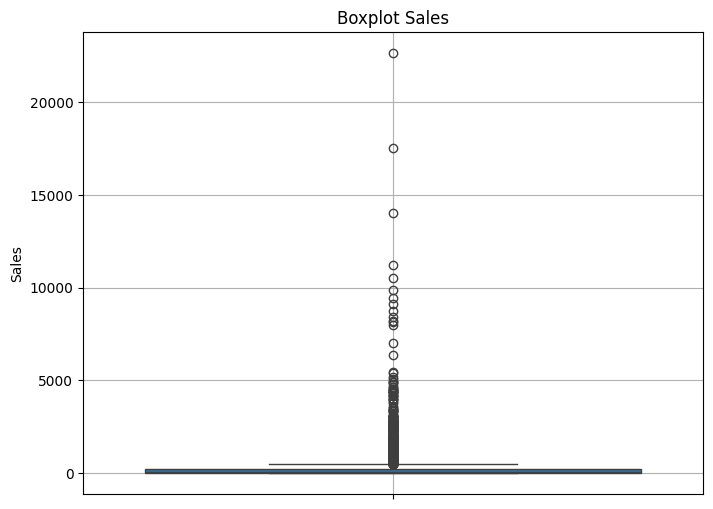

In [19]:
# Membuat boxplot untuk kolom 'Sales'
plt.figure(figsize=(8, 6))
sns.boxplot(y='Sales', data=data_master)
plt.title('Boxplot Sales')
plt.ylabel('Sales')
plt.grid()
plt.show()

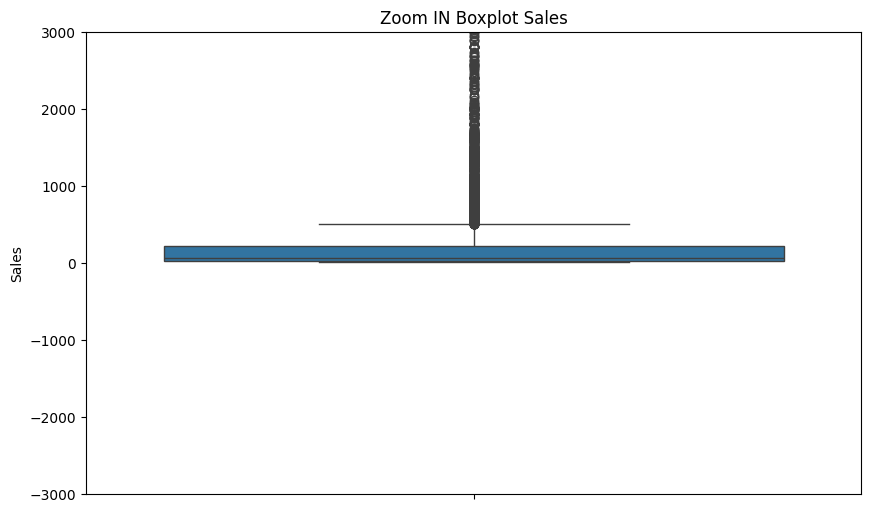

In [20]:
# Menentukan ukuran figure
plt.figure(figsize=(10, 6))

# Membuat boxplot
sns.boxplot(data=data_master, y='Sales')

# Customize rentang data Sales agar boxplot terlihat jelas
plt.ylim(-3000, 3000)
# Menambahkan judul dan label
plt.title('Zoom IN Boxplot Sales')
plt.ylabel('Sales')

# Menampilkan plot
plt.show()

Dari hasil diatas, boxplot untuk kolom `Sales` menunjukkan bahwa median terletak di bagian bawah box, dengan ekor panjang di sisi kanan (right skewed). **Ini menandakan bahwa sebagian besar transaksi memiliki nilai penjualan yang relatif rendah, tetapi terdapat beberapa transaksi dengan nilai penjualan yang sangat tinggi**. Hal ini menunjukkan potensi untuk meningkatkan pendapatan melalui fokus pada produk atau pelanggan yang menghasilkan penjualan besar, meskipun mayoritas transaksi tidak menyumbang secara signifikan terhadap total penjualan.

#### Kolom `Profit`

In [21]:
print('------------------------------------------------------------------------')
# General Statistic Info untuk kolom Profit
profit_descriptive = data_master['Profit'].describe()
# Menentukan Area Q1 & Q3
Q1 = data_master['Profit'].quantile(0.25)
Q3 = data_master['Profit'].quantile(0.75)
IQR = Q3 - Q1
# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Menampilkan hasil
print(f'General Statisctic Info: \n{profit_descriptive}')
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

print('------------------------------------------------------------------------')

# Menemukan outliers
outliers = data_master[(data_master['Profit'] < lower_bound) | (data_master['Profit'] > upper_bound)]
print(f'Tabel Outliers Data di kolom Profit: \n {outliers[['Row ID', 'Profit']]}')

print('------------------------------------------------------------------------')

# Perbandingan total outliers
total_rows = data_master.shape[0]
num_outliers = outliers.shape[0]
percentage_outliers = (num_outliers / total_rows) * 100
print(f"Jumlah Outliers: {num_outliers}")
print(f"Total Rows: {total_rows}")
print(f"Persentase Outliers: {percentage_outliers:.2f}% dari 100%")

print('------------------------------------------------------------------------')


------------------------------------------------------------------------
General Statisctic Info: 
count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64
Q1: 1.72875, Q3: 29.364, IQR: 27.63525
Lower Bound: -39.724125, Upper Bound: 70.816875
------------------------------------------------------------------------
Tabel Outliers Data di kolom Profit: 
       Row ID    Profit
1          2  219.5820
3          4 -383.0310
7          8   90.7152
10        11   85.3092
13        14  132.5922
...      ...       ...
9957    9958  109.7208
9962    9963  -67.6704
9968    9969  331.1910
9979    9980  153.1152
9993    9994   72.9480

[1881 rows x 2 columns]
------------------------------------------------------------------------
Jumlah Outliers: 1881
Total Rows: 9994
Persentase Outliers: 18.82% dari 100%
------------------------------------------------------

Dari general info dan tabel diatas, dapat kita ketahui bahwa outliers di kolom Profit adalah data yang nilainya lebih kecil dari Lower Bound (-39.724125) atau data lebih besar dari upper bound (70.816875). Terdapat 18.82% outliers yaitu 1881 data dari total 9994 data.

Untuk mengetahui lebih detail persebaran data dan posisinya secara visual, yaitu:

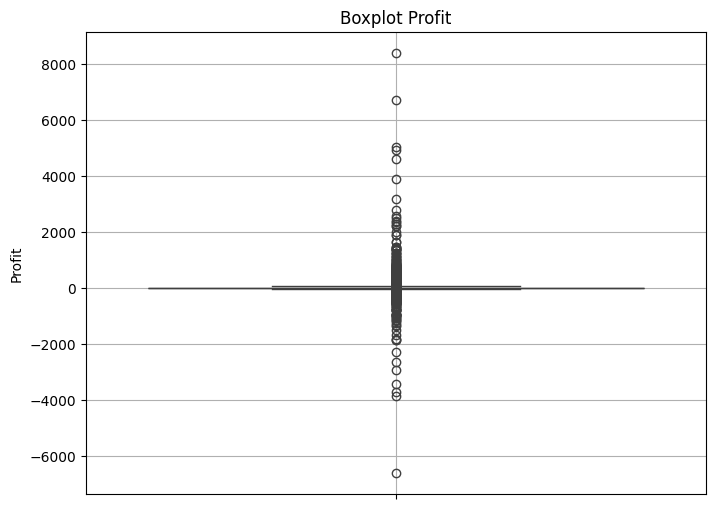

In [22]:
# Membuat boxplot untuk kolom 'Profit'
plt.figure(figsize=(8, 6))
sns.boxplot(y='Profit', data=data_master)
plt.title('Boxplot Profit')
plt.ylabel('Profit')
plt.grid()
plt.show()

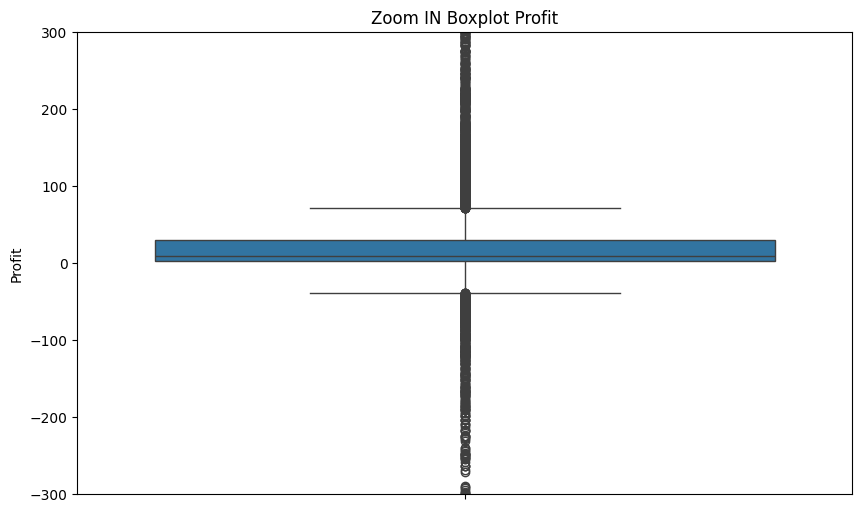

In [23]:
# Menentukan ukuran figure
plt.figure(figsize=(10, 6))

# Membuat boxplot
sns.boxplot(data=data_master, y='Profit')

# Customize rentang data Profit agar boxplot terlihat jelas
plt.ylim(-300, 300)
# Menambahkan judul dan label
plt.title('Zoom IN Boxplot Profit')
plt.ylabel('Profit')

# Menampilkan plot
plt.show()


Dari hasil diatas, boxplot untuk kolom `Profit` menunjukkan bahwa median terletak di bagian bawah box, dengan ekor panjang di sisi kanan. Ini menunjukkan bahwa distribusi profit bersifat right skewed, **di mana sebagian besar transaksi menghasilkan profit yang rendah, namun ada beberapa transaksi yang sangat menguntungkan**. Hal ini mengindikasikan adanya potensi keuntungan yang besar dari beberapa penjualan yang berhasil, meskipun mayoritas penjualan tidak memberikan profit yang signifikan.

#### Kolom `Quantity`

In [24]:
print('------------------------------------------------------------------------')
# General Statistic Info untuk kolom Quantity
profit_descriptive = data_master['Quantity'].describe()
# Menentukan Area Q1 & Q3
Q1 = data_master['Quantity'].quantile(0.25)
Q3 = data_master['Quantity'].quantile(0.75)
IQR = Q3 - Q1
# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Menampilkan hasil
print(f'General Statisctic Info: \n{profit_descriptive}')
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

print('------------------------------------------------------------------------')

# Menemukan outliers
outliers = data_master[(data_master['Quantity'] < lower_bound) | (data_master['Quantity'] > upper_bound)]
print(f'Tabel Outliers Data di kolom Quantity: \n {outliers[['Row ID', 'Quantity']]}')

print('------------------------------------------------------------------------')

# Perbandingan total outliers
total_rows = data_master.shape[0]
num_outliers = outliers.shape[0]
percentage_outliers = (num_outliers / total_rows) * 100
print(f"Jumlah Outliers: {num_outliers}")
print(f"Total Rows: {total_rows}")
print(f"Persentase Outliers: {percentage_outliers:.2f}% dari 100%")

print('------------------------------------------------------------------------')


------------------------------------------------------------------------
General Statisctic Info: 
count    9994.000000
mean        3.789574
std         2.225110
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64
Q1: 2.0, Q3: 5.0, IQR: 3.0
Lower Bound: -2.5, Upper Bound: 9.5
------------------------------------------------------------------------
Tabel Outliers Data di kolom Quantity: 
       Row ID  Quantity
113      114        14
139      140        14
147      148        11
251      252        13
329      330        10
...      ...       ...
9882    9883        13
9895    9896        11
9941    9942        14
9979    9980        14
9984    9985        10

[170 rows x 2 columns]
------------------------------------------------------------------------
Jumlah Outliers: 170
Total Rows: 9994
Persentase Outliers: 1.70% dari 100%
------------------------------------------------------------------------


Dari general info dan tabel diatas, dapat kita ketahui bahwa outliers di kolom Quantity adalah data yang nilainya lebih kecil dari Lower Bound (-2.5) atau data lebih besar dari upper bound (9.5). Terdapat 1.70% outliers yaitu 170 data dari total 9994 data.

Untuk mengetahui lebih detail persebaran data dan posisinya secara visual, yaitu:

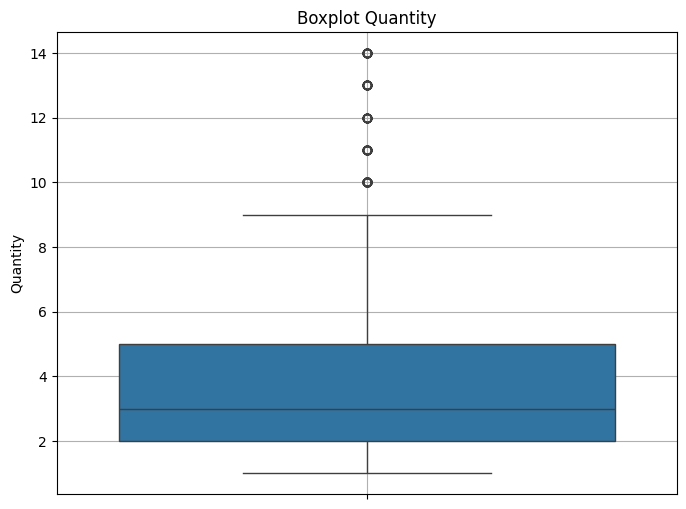

In [25]:
# Membuat boxplot untuk kolom 'Quantity'
plt.figure(figsize=(8, 6))
sns.boxplot(y='Quantity', data=data_master)
plt.title('Boxplot Quantity')
plt.ylabel('Quantity')
plt.grid()
plt.show()

Dari hasil diatas, boxplot untuk kolom `Quantity` menunjukkan bahwa median terletak di bagian bawah box, dengan ekor panjang di sisi kanan. Ini menunjukkan bahwa distribusi profit bersifat right skewed, dimana **mayoritas transaksi melibatkan pembelian dalam jumlah yang lebih kecil, sementara terdapat sejumlah kecil transaksi yang melibatkan quantity yang sangat tinggi**. Fenomena ini memberikan gambaran bahwa meskipun banyak pelanggan membeli dalam jumlah sedikit, ada potensi pendapatan yang signifikan dari transaksi dengan quantity tinggi yang perlu diperhatikan.

#### Kolom `Discount`

In [26]:
print('------------------------------------------------------------------------')
# General Statistic Info untuk kolom Discount
profit_descriptive = data_master['Discount'].describe()
# Menentukan Area Q1 & Q3
Q1 = data_master['Discount'].quantile(0.25)
Q3 = data_master['Discount'].quantile(0.75)
IQR = Q3 - Q1
# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Menampilkan hasil
print(f'General Statisctic Info: \n{profit_descriptive}')
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

print('------------------------------------------------------------------------')

# Menemukan outliers
outliers = data_master[(data_master['Discount'] < lower_bound) | (data_master['Discount'] > upper_bound)]
print(f'Tabel Outliers Data di kolom Discount: \n {outliers[['Row ID', 'Discount']]}')

print('------------------------------------------------------------------------')

# Perbandingan total outliers
total_rows = data_master.shape[0]
num_outliers = outliers.shape[0]
percentage_outliers = (num_outliers / total_rows) * 100
print(f"Jumlah Outliers: {num_outliers}")
print(f"Total Rows: {total_rows}")
print(f"Persentase Outliers: {percentage_outliers:.2f}% dari 100%")

print('------------------------------------------------------------------------')


------------------------------------------------------------------------
General Statisctic Info: 
count    9994.000000
mean        0.156203
std         0.206452
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64
Q1: 0.0, Q3: 0.2, IQR: 0.2
Lower Bound: -0.30000000000000004, Upper Bound: 0.5
------------------------------------------------------------------------
Tabel Outliers Data di kolom Discount: 
       Row ID  Discount
14        15       0.8
15        16       0.8
28        29       0.7
32        33       0.7
36        37       0.6
...      ...       ...
9870    9871       0.7
9877    9878       0.7
9903    9904       0.6
9920    9921       0.8
9921    9922       0.7

[856 rows x 2 columns]
------------------------------------------------------------------------
Jumlah Outliers: 856
Total Rows: 9994
Persentase Outliers: 8.57% dari 100%
-------------------------------------------------------------

Dari general info dan tabel diatas, dapat kita ketahui bahwa outliers di kolom Discount adalah data yang nilainya lebih kecil dari Lower Bound (-0.3) atau data lebih besar dari upper bound (0.5). Terdapat 8.57% outliers yaitu 856 data dari total 9994 data.

Untuk mengetahui lebih detail persebaran data dan posisinya secara visual, yaitu:

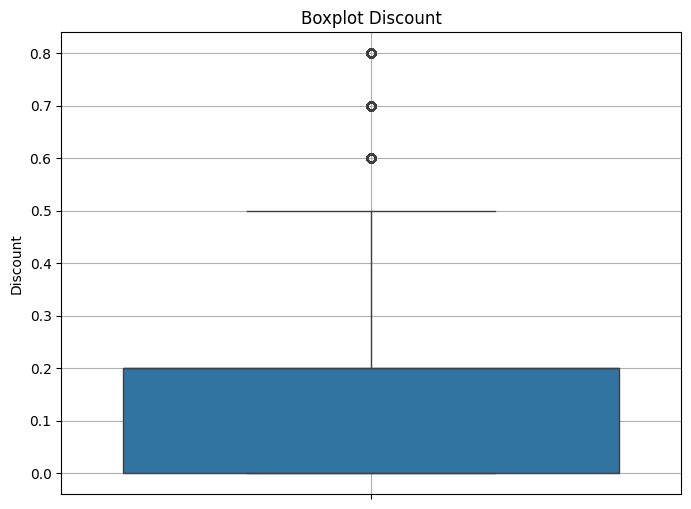

In [27]:
# Membuat boxplot untuk kolom 'Discount'
plt.figure(figsize=(8, 6))
sns.boxplot(y='Discount', data=data_master)
plt.title('Boxplot Discount')
plt.ylabel('Discount')
plt.grid()
plt.show()

Boxplot untuk kolom `Discount` menunjukkan distribusi yang right skewed, dengan garis median yang terletak lebih dekat ke batas bawah box dan ekor yang lebih panjang di sisi kanan. **Ini menandakan bahwa sebagian besar transaksi mendapatkan diskon yang relatif kecil, sementara terdapat sejumlah kecil transaksi yang mendapatkan diskon yang signifikan**. Hal ini menunjukkan adanya potensi untuk menarik lebih banyak pelanggan dengan memberikan diskon yang lebih besar atau mengkaji ulang kebijakan diskon untuk memahami dampaknya terhadap profitabilitas.

#### Tindakan terhadap Data Outliers

Outliers ditemukan dalam kolom yang relevan yaitu  Sales, Profit, Quantity dan Discount. Kita harus memutuskan tindakan yang tepat dalam mengatasi nya. Disini, kita akan **menerima data outliers yang ada dengan tujuan untuk melakukan eksplorasi data lebih lanjut dan melihat bagaimana outliers mempengaruhi distribusi dan hasil analisis kedepan.**


# Uji Normalitas Data

Tahap akhir sebelum analisis, kita akan melakukan Uji Normalitas Data untuk menentukan apakah data mengikuti distribusi normal atau distribusi tidak normal. Disini kita hanya akan Uji Normalitas Data di kolom numerikal yang relevan agar lebih efektif. Ada 4 yang akan di uji, yaitu kolom `Sales`, `Profit`, `Quantity` dan `Discount`.

Kolom `Sales`

In [28]:
stat_tip, pval_tip = shapiro(data_master['Sales'])

if pval_tip < 0.05:
    print(f'Kolom tidak berdistribusi normal')
else:
    print(f'Kolom berdistribusi normal)')

pval_tip

Kolom tidak berdistribusi normal


np.float64(4.065053524283138e-105)

Kolom `Profit`

In [29]:
stat_tip, pval_tip = shapiro(data_master['Profit'])

if pval_tip < 0.05:
    print(f'Kolom tidak berdistribusi normal')
else:
    print(f'Kolom berdistribusi normal)')

pval_tip

Kolom tidak berdistribusi normal


np.float64(1.6987856431861806e-107)

Kolom `Quantity`

In [30]:
stat_tip, pval_tip = shapiro(data_master['Quantity'])

if pval_tip < 0.05:
    print(f'Kolom tidak berdistribusi normal')
else:
    print(f'Kolom berdistribusi normal)')

pval_tip

Kolom tidak berdistribusi normal


np.float64(1.5185663017552264e-65)

Kolom `Discount`

In [31]:
stat_tip, pval_tip = shapiro(data_master['Discount'])

if pval_tip < 0.05:
    print(f'Kolom tidak berdistribusi normal')
else:
    print(f'Kolom berdistribusi normal)')

pval_tip

Kolom tidak berdistribusi normal


np.float64(1.0308474818227113e-84)

Semua hasil Uji Normalitas Data yang dilakukan pada empat kolom numerikal ini menunjukkan bahwa data nya tidak berdistribusi normal. Sebelumya, saat mengecek outliers pun kita mendapatkan wawasan bahwa kolom-kolom tersebut mempunyai data yang outliers dengan hasil boxplot right skewed. Perlu diingat, **tidak selalu data yang berdistribusi tidak normal mempunyai outliers, namun data outliers dapat mempengaruhi normalitas distribusi**. Dikarenakan itu, berarti ada beberapa nilai yang jauh lebih tinggi dari rata-rata, yang dapat menunjukkan adanya produk atau transaksi yang sangat menguntungkan dan menarik perhatian, tetapi juga dapat menciptakan bias dalam analisis.

Dengan itu, dalam konteks SparksHUB, tidak adanya distribusi normal di kolom-kolom ini menunjukkan bahwa **strategi yang digunakan saat ini mungkin tidak merata**. Misalnya, beberapa produk mungkin sangat menguntungkan sementara yang lain tidak. Hal ini penting untuk diidentifikasi agar perusahaan dapat merumuskan strategi agar pendapatan yang lebih baik dan memahami faktor yang memengaruhi kinerja produk.

# Data yang sudah bersih

Kita sudah selesai membersihkan data kita, sekarang mari kita lihat informasi dari data yang sudah kita bersihkan.

In [32]:
cleanedData = data_master
cleanedData

,Row ID,Order ID,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Kategori Profit
0,1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,Keuntungan
1,2,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,Keuntungan
2,3,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,Keuntungan
3,4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,Kerugian
4,5,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,Keuntungan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028,Keuntungan
9990,9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332,Keuntungan
9991,9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932,Keuntungan
9992,9993,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200,Keuntungan


In [33]:
cleanedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Row ID           9994 non-null   int64         
 1   Order ID         9994 non-null   object        
 2   Date Key         9994 non-null   datetime64[ns]
 3   Contact Name     9994 non-null   object        
 4   Country          9994 non-null   object        
 5   City             9994 non-null   object        
 6   Region           9994 non-null   object        
 7   Subregion        9994 non-null   object        
 8   Customer         9994 non-null   object        
 9   Customer ID      9994 non-null   int64         
 10  Industry         9994 non-null   object        
 11  Segment          9994 non-null   object        
 12  Product          9994 non-null   object        
 13  License          9994 non-null   object        
 14  Sales            9994 non-null   float64

Sebelum dan setelah dibersihkan, kita tetap memiliki total data yang sama, 9994 baris dan 19 kolom karena tidak ada missing value. Namun, ada beberapa hal yang berubah dan di simpulkan, yaitu:

- Penambahan satu kolom baru (`Kategori Profit`) dan penghapusan kolom yang tidak relevan (`Order Date`)
- Mengganti format data di beberapa kolom sesuai dengan isi dan tujuan nya
- Memastikan seluruh data di `Date Key` sesuai format YYYYMMDD
- Mendapatkan timeframe data, seluruh data ini merupakan transaksi yang dimulai dari 4 Januari 2020 sampai 31 Desember 2023
- Tiap kolom yang berhubungan, sudah di validasi bahwa semua nya mempunyai pasangan data yang konsisten
- Menemukan beberapa outliers dan mengatasi nya dengan pertimbangan sesuai tujuan analisis
- Mengetahui bahwa kolom numerikal yang relevan, berdistribusi tidak normal

# Data Analisis

Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mendapatkan **kebijakan yang tepat sehingga mengoptimalkan pendapatan**.

## Profitabilitas berdasarkan Produk

Sekarang kita akan mengevaluasi keuntungan dan kerugian dari kolom Profit yang dihasilkan oleh setiap produk (seperti *Marketing Suite* dan *FinanceHub*). Tujuannya, analisis ini akan mengidentifikasi produk yang memberikan kontribusi tertinggi dan produk yang membutuhkan peningkatan agar lebih menguntungkan untuk SparksHUB.

Harap diingat, sesuai dengan timeframe to assume, data dimulai dari 4 Januari 2020 - 31 Desember 2023. Pertama, kita akan menyusun tabel yang berisi kolom-kolom `Product`, `Profit` dan `Kategori Profit`. Disini kita akan mengkalkulasi **total Keuntungan dan Kerugian** dari penjualan tiap produk untuk membandingkan nya.

In [34]:
# Membuat Pivot Table sesuai dengan kolom yang dibutuhkan untuk analisis
profit_table = cleanedData.pivot_table(
    index='Product', 
    columns='Kategori Profit', 
    values='Profit', 
    aggfunc='sum', 
    fill_value=0
)

# Mengubah urutan kolom menjadi "Keuntungan" terlebih dahulu, baru "Kerugian"
profit_table = profit_table.reindex(columns=['Keuntungan', 'Kerugian'])

# Reset index
profit_table.reset_index(inplace=True)
profit_table.columns.name = None  # Hapus nama kolom yang tidak diinginkan

# Tampilkan hasil
print('Tabel 1. Total Keuntungan & Kerugian tiap Produk')
profit_table

Tabel 1. Total Keuntungan & Kerugian tiap Produk


,Product,Keuntungan,Kerugian
0,Alchemy,55617.8249,0.0000
1,Big Ol Database,33503.4251,-30118.6682
2,ChatBot Plugin,6527.7870,0.0000
3,ContactMatcher,83418.9269,-70922.6447
4,Data Smasher,42867.2622,-930.6265
5,FinanceHub,42017.2616,-9880.8413
6,Marketing Suite,8679.6500,-12152.2060
7,Marketing Suite - Gold,27705.1302,-6426.3038
8,OneView,26767.6466,-8629.6412
9,SaaS Connector Pack,19550.0570,-6490.9134


Dari tabel diatas, kita akan menampilkan nya dalam grafik:

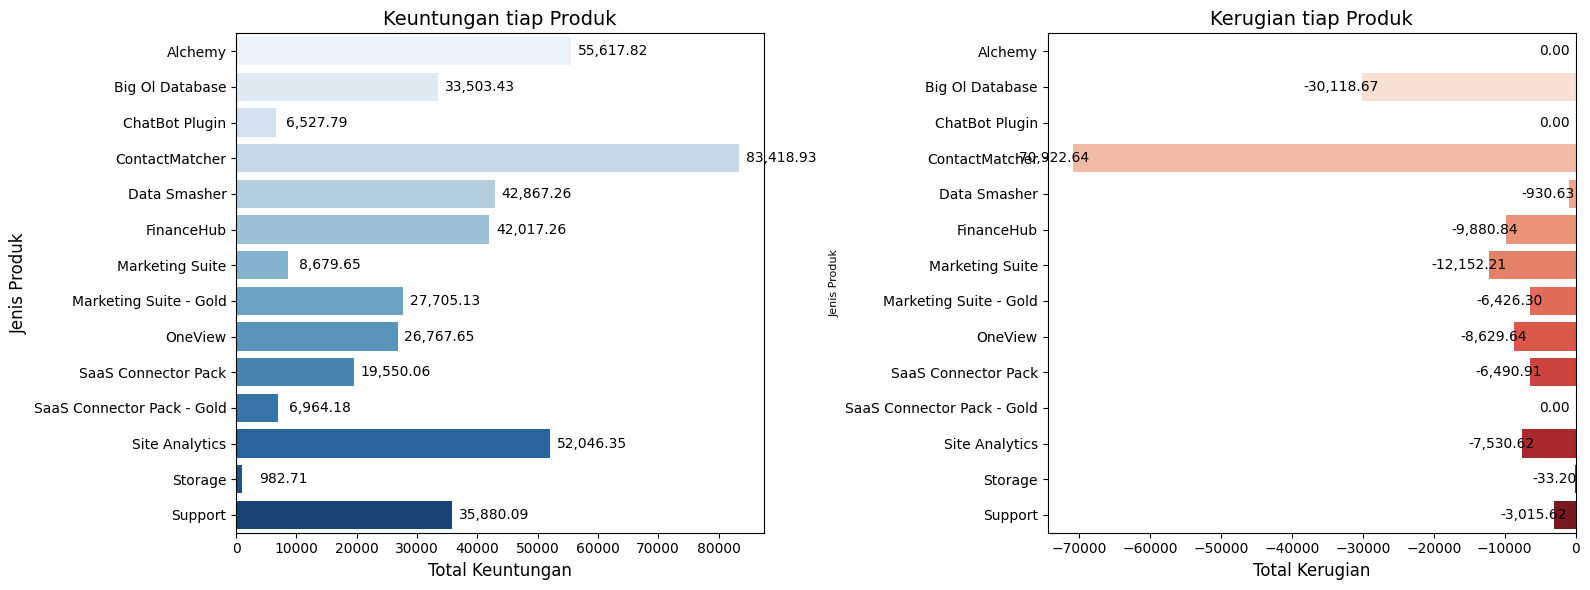

In [35]:
# Membuat figure dan axes untuk dua subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Grafik 1: Total Keuntungan per produk
sns.barplot(x='Keuntungan', y='Product', data=profit_table, palette='Blues', ax=axes[0])
axes[0].set_title('Keuntungan tiap Produk', fontsize=14)
axes[0].set_xlabel('Total Keuntungan', fontsize=12)
axes[0].set_ylabel('Jenis Produk', fontsize=12)
# Menambahkan label total Keuntungan di kanan setiap bar
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_width():,.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                     ha='center', va='center', fontsize=10, color='black', xytext=(30, 0), textcoords='offset points')

# Grafik 2: Total Kerugian per produk
sns.barplot(x='Kerugian', y='Product', data=profit_table, palette='Reds', ax=axes[1])
axes[1].set_title('Kerugian tiap Produk', fontsize=14)
axes[1].set_xlabel('Total Kerugian', fontsize=12)
axes[1].set_ylabel('Jenis Produk', fontsize=8)
# Menambahkan label total Kerugian di kiri setiap bar
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_width():,.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                     ha='center', va='center', fontsize=10, color='black', xytext=(-15, 0), textcoords='offset points')

# Menyesuaikan layout agar tidak ada yang tertutup
plt.tight_layout()

# Menampilkan plot
plt.show()


Di Grafik atas, terlihat ada beberapa produk yang menghasilkan keuntungan yang banyak namun sama besarnya dengan kerugian nya. Ada juga produk yang mempunyai keuntungan dan tidak terjadi kerugian sama sekali. Terakhir ada beberapa produk yang mempunyai keuntungan dan kerugian dengan nilai yang tidak drastis.

Ternyata untuk mengetahui produk mana yang memiliki kontribusi tertinggi dan produk mana yang perlu peningkatan, tidak cukup sebatas melihat total keuntungan dan total kerugian. Terbukti pada grafik diatas, tiap produk memiliki karakteristik. Untuk itu, kita akan membuat kolom baru yang memperjelas hubungan antar keuntungan dan kerugian produk dalam menyimpulkan mana yang memiliki kontribusi tertinggi dan mana yang perlu ditingkatkan.

Disini, kita akan menambahkan kolom **Ratio Profit** dan **Net Profit**.

Ratio Profit menggambarkan efisiensi produk dalam menghasilkan keuntungan dibandingkan dengan kerugian yang ditanggung. Ratio Profit ini dapat dihitung sebagai:

$
Ratio Profit =  Total Profit Kerugian / Total Profit Keuntungan
$

Dimana semakin besar nilai Ratio Profit berarti keuntungan produk tersebut lebih besar daripada kerugiannya, dan begitupun sebaliknya.

In [36]:
# Menambahkan kolom Ratio Profit
profit_table['Ratio Profit'] = profit_table['Kerugian'] / profit_table['Keuntungan']

# Sorting dari nilai Ratio Profit terbesar
profit_table = profit_table.sort_values(by='Ratio Profit', ascending=False).reset_index(drop=True)
profit_table

# Tampilkan hasil
print('Tabel 2. Total Keuntungan, Kerugian dan Ration Profit tiap Produk')
profit_table

Tabel 2. Total Keuntungan, Kerugian dan Ration Profit tiap Produk


,Product,Keuntungan,Kerugian,Ratio Profit
0,Alchemy,55617.8249,0.0000,0.000000
1,ChatBot Plugin,6527.7870,0.0000,0.000000
2,SaaS Connector Pack - Gold,6964.1767,0.0000,0.000000
3,Data Smasher,42867.2622,-930.6265,-0.021709
4,Storage,982.7134,-33.1952,-0.033779
5,Support,35880.0917,-3015.6219,-0.084047
6,Site Analytics,52046.3541,-7530.6235,-0.144691
7,Marketing Suite - Gold,27705.1302,-6426.3038,-0.231954
8,FinanceHub,42017.2616,-9880.8413,-0.235161
9,OneView,26767.6466,-8629.6412,-0.322391


Setelah di sorting, angka Ratio Profit terbesar adalah 0 dan yang paling kecil adalah -1.4. Ratio Profit 0 artinya tidak ada total kerugian yang dimiliki karena 0/angka apapun = 0.

Nah, dari tabel diatas, dapat kita ketahui bahwa Alchemy, ChatBot Plugin dan Saas Connector Pack - Gold merupakan produk yang memberikan keuntungan dan tidak mengalami kerugian sama sekali. Namun belum kita ketahui, apakah produk tersebut memiliki keuntungan yang paling tinggi? Maka dari itu, kita akan membuat Net Profit. Net Profit adalah angka keuntungan bersih setelah dikurangi dengan kerugian yang dialami.

In [37]:
# Buat kolom baru 'Net Profit' berdasarkan nilai di kolom 'Profit'
profit_table['Net Profit'] = profit_table['Keuntungan'] - (-profit_table['Kerugian'])

# Sort by 'Net Profit' dan reset index lagi setelah sorting
profit_table = profit_table.sort_values(by=['Net Profit'], ascending=False).reset_index(drop=True)

print('Tabel 3. Total Keuntungan, Kerugian, Ratio & Net Profit tiap Produk')
profit_table

Tabel 3. Total Keuntungan, Kerugian, Ratio & Net Profit tiap Produk


,Product,Keuntungan,Kerugian,Ratio Profit,Net Profit
0,Alchemy,55617.8249,0.0000,0.000000,55617.8249
1,Site Analytics,52046.3541,-7530.6235,-0.144691,44515.7306
2,Data Smasher,42867.2622,-930.6265,-0.021709,41936.6357
3,Support,35880.0917,-3015.6219,-0.084047,32864.4698
4,FinanceHub,42017.2616,-9880.8413,-0.235161,32136.4203
5,Marketing Suite - Gold,27705.1302,-6426.3038,-0.231954,21278.8264
6,OneView,26767.6466,-8629.6412,-0.322391,18138.0054
7,SaaS Connector Pack,19550.0570,-6490.9134,-0.332015,13059.1436
8,ContactMatcher,83418.9269,-70922.6447,-0.850198,12496.2822
9,SaaS Connector Pack - Gold,6964.1767,0.0000,0.000000,6964.1767


Dapat kita lihat tabel diatas setelah ditambah Net Profit, `Alchemy` adalah satu-satunya produk yang memiliki kontribusi keuntungan paling tinggi dan tidak mengalami kerugian sama sekali. Namun, kita perlu memvisualisasi lebih lanjut agar mengetahui juga produk mana saja yang yang  membutuhkan peningkatan agar lebih kompetitif atau lebih menguntungkan seperti Alchemy untuk SparksHUB.

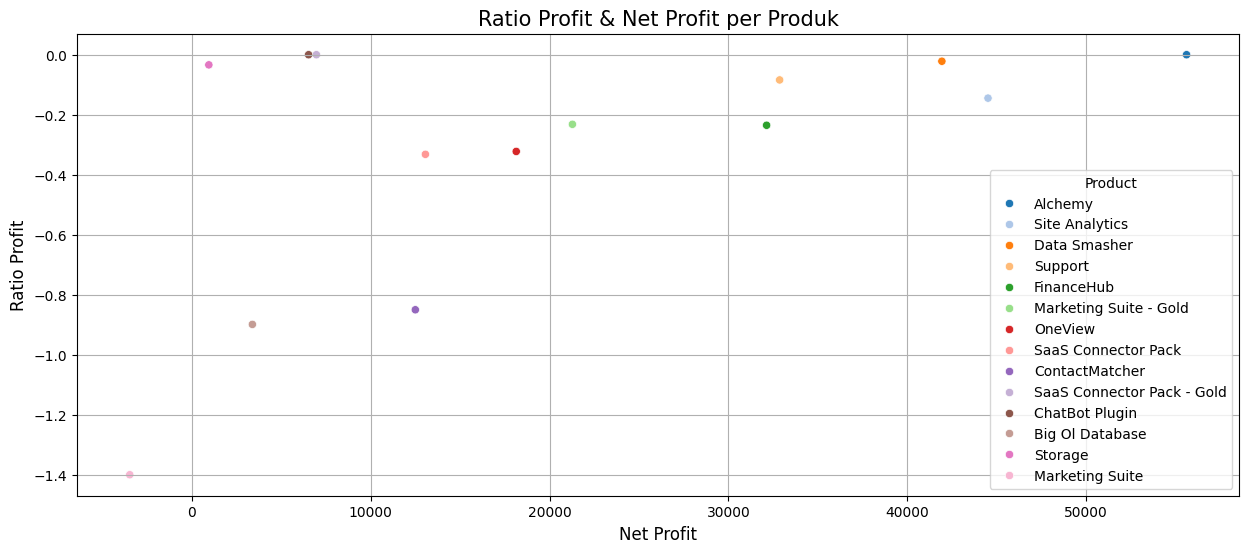

In [38]:
# Menggunakan seaborn untuk scatter plot dengan hue berdasarkan 'Product'
plt.figure(figsize=(15,6))
sns.scatterplot(data=profit_table, x='Net Profit', y='Ratio Profit', hue='Product', palette='tab20', alpha=1)

# Menambahkan judul dan label sumbu
plt.title('Ratio Profit & Net Profit per Produk', size=15)
plt.xlabel('Net Profit', size=12)
plt.ylabel('Ratio Profit', size=12)

# Menambahkan grid untuk kemudahan visualisasi
plt.grid(True)

plt.show()

Dari grafik diatas, setiap titik mewakili produk yang berbeda, dimana Ratio Profit di sumbu X dan Net Profit di sumbu Y. Harap diingat:
- Jika Net Profit > 0 semakin ke kanan berarti total keuntungan nya besar, semakin ke kiri daberarti total keuntungan nya kecil
- Jika Net Profit < 0 berarti tidak ada keuntungan yang terjadi, hanya kerugian yg dialami.

Untuk itu, ada Ratio Profit yang membandingkan keuntungan dan kerugian yang didapat.
- Jika Ratio Profit = 0, berarti nilai keuntungan lebih besar dan tidak ada kerugian yang didapatkan
- Jika Ratio Profit diantara 0 sampai -1, semakin kecil rasio maka, keuntungan lebih besar walau ada kerugian yang didapatkan
- Jika Ratio Profit <-1, semakin kecil rasio maka, kerugian lebih besar dibanding keuntungan yang didapat.

Dari situ kita mendapat tiap produk:

- **Produk dengan Rasio Profit Terbaik**

    Produk-produk seperti `Alchemy`, `ChatBotPlugin` dan `Saas Connector Pack- Gold` berada di titik 0 Rasio Profit yang dapat dianggap sebagai produk dengan performa sangat baik karena mereka tidak mengalami kerugian. Di antara mereka, `Alchemy` menunjukkan keuntungan tertinggi, menjadikannya kandidat utama untuk lebih diinvestasikan atau ditingkatkan dari segi penjualan.

- **Produk dengan Keuntungan Tinggi tetapi Mengalami Kerugian (Moderate Efficiency)**

    Beberapa produk seperti `Data Smasher, Support dan Site Analytics` memang memiliki keuntungan yang signifikan. Namun, kerugian yang mereka alami cukup besar, sehingga rasio profit menjadi negatif (di bawah 0). Ini menunjukkan bahwa meskipun menguntungkan, mereka membutuhkan kontrol biaya atau pengurangan pengeluaran operasional untuk meningkatkan efisiensi keuntungan bersih.

- **Produk Moderat dalam Keuntungan dan Kerugian**

    `FinanceHub` menempati posisi sedang dengan keuntungan dan kerugian yang cukup berimbang, serta Rasio Profit moderat. Dengan kerugian lebih besar dari produk-produk sebelumnya, produk ini mungkin membutuhkan strategi efisiensi agar bisa meningkatkan margin keuntungannya, terutama jika ingin bersaing dengan produk-produk lain dalam hal pendapatan bersih.

- **Produk dengan Keuntungan Kecil dan Kerugian Besar**

    Produk seperti `Marketing Suite - Gold`, `OneView`, dan `SaaS Connector Pack` menunjukkan keuntungan yang lebih kecil dibandingkan dengan kerugian. Ini berarti bahwa walaupun mereka menghasilkan keuntungan, kontribusi bersih mereka terhadap pendapatan cukup terbatas. Sebagai strategi, mungkin perlu dievaluasi apakah produk-produk ini layak untuk dipertahankan atau harus mengalami penyesuaian harga atau biaya produksi untuk meningkatkan keuntungan.

- **Produk dengan Rasio Profit Rendah (Keuntungan Tipis)**

    `ContactMatcher` dan `Big Ol Database` menunjukkan margin keuntungan bersih yang sangat kecil. Ini berarti bahwa sebagian besar pendapatan yang dihasilkan habis untuk menutupi kerugian. Pengoptimalan biaya, inovasi produk, atau penyesuaian model bisnis mungkin diperlukan untuk meningkatkan profitabilitas produk ini.

- **Produk dengan Profitabilitas Negatif**

    `Marketing Suite` adalah produk yang banyak mengalami kerugian, dengan rasio profit yang paling rendah (-1.4). Ini menandakan bahwa kerugian jauh lebih besar daripada keuntungan. Dalam jangka panjang, produk ini mungkin akan lebih membebani perusahaan, sehingga strategi penghentian, rebranding, atau repositioning produk dapat dipertimbangkan agar lebih efektif.

----------------------------------------------------------------------------

Dari grafik-grafik di atas dan kesimpulan tiap produk, maka kita bisa menjawab pertanyaan:

**Produk SparksHUB mana yang memberikan kontribusi tertinggi terhadap profit perusahaan? dan produk mana yang perlu peningkatan agar lebih menguntungkan?**

- Diantara Produk SparksHUB, `Alchemy` adalah produk yang memberikan kontribusi paling tinggi terhadap profit perusahaan, diikuti oleh `OneView` dan `SaaS Connector Pack - Gold`. Ketiga produk ini tidak memiliki kerugian dan secara konsisten berkontribusi positif terhadap pendapatan.
- Produk yang perlu peningkatan agar lebih menguntungkan, diantaranya ada ` Site Analytics` dan `FinanceHub`. Kedua produk ini perlu dioptimalkan untuk mengurangi kerugian, sehingga keuntungannya yang masih termasuk tinggi, tidak berkurang. Selain itu, produk `Marketing Suite` perlu dipertimbangkan kembali untuk dievaluasi kelayakan nya karena produk ini mengalami kerugian yang jauh lebih besar daripada keuntungan yang didapat.

----------------------------------------------------------------------------

## Efektivitas Diskon terhadap Penjualan dan Profitabilitas

Setelah mengetahui gambaran situasi profit dari tiap produk yang dijual, selanjutnya kita akan menganalisa dampak diskon pada penjualan dan profitabilitas. Analisis ini menunjukkan apakah strategi diskon saat ini cukup efektif dalam meningkatkan volume penjualan tanpa mengorbankan keuntungan. Harapannya, kita dapat menemukan nominal diskon yang optimal.

Pertama kita akan mengkalkulasi rata-rata diskon, penjualan dan profit pada tiap produk. Di Uji Normalitas Data sebelumnya, kita mengetahui bahwa kolom `Discount, Profit` dan `Sales` merupakan Distribusi Tidak Normal. Untuk itu dalam mencari rata-rata, kita akan menggunakan median karena lebih tahan terhadap outlier.

In [39]:
discTable = cleanedData

In [40]:
discTable['Discount'].unique()

array([0.  , 0.45, 0.2 , 0.8 , 0.3 , 0.5 , 0.7 , 0.6 , 0.32, 0.1 , 0.4 ,
       0.15])

Jika kita lihat, angka di kolom `Discount` dimulai dari 0 sampai 0.8, atau 0% - 80%. Hal ini berarti dua kondisi, transaksi tanpa diskon dan ada diskon. Maka dari itu kita akan menganalisis kedua kondisi tersebut.

In [41]:
# Rata-rata Penjualan & Profit keseluruhan diskon =0 dan >0
avg_sales = discTable['Sales'].median()
avg_profit = discTable['Profit'].median()

print('Data dengan Diskon (>= 0%): ')
print(f'Rata-rata Sales {avg_sales:.2f}')
print(f'Rata-rata Profit {avg_profit:.2f}')

Data dengan Diskon (>= 0%): 
Rata-rata Sales 54.49
Rata-rata Profit 8.67


In [42]:
# Rata-rata Sales & Profit tanpa diskon =0
discTableWithout = discTable[discTable['Discount'] == 0]

# Uji Normalitas kolom Sales & Profit dari discTableWithout
stat_tip, pval_tip = shapiro(discTableWithout['Profit'])
if pval_tip < 0.05:
    print(f'Kolom tidak berdistribusi normal')
else:
    print(f'Kolom berdistribusi normal)')

# Menggunakan median krn distribusi tetap tidak normal seperti discTable
avg1_sales = discTableWithout['Sales'].median()
avg1_profit = discTableWithout['Profit'].median()

print('Tanpa Diskon (= 0%): ')
print(f'Rata-rata Sales {avg1_sales:.2f}')
print(f'Rata-rata Profit {avg1_profit:.2f}')

Kolom tidak berdistribusi normal
Tanpa Diskon (= 0%): 
Rata-rata Sales 53.55
Rata-rata Profit 16.00


In [43]:
# Rata-rata Penjualan & Profit dengan diskon > 0
discTableWith = discTable[discTable['Discount'] > 0]

# Uji Normalitas kolom Sales & Profit dari discTableWith
stat_tip, pval_tip = shapiro(discTableWith['Profit'])
if pval_tip < 0.05:
    print(f'Kolom tidak berdistribusi normal')
else:
    print(f'Kolom berdistribusi normal)')

# Menggunakan median krn distribusi tetap tidak normal seperti discTable
avg2_sales = discTableWith['Sales'].median()
avg2_profit = discTableWith['Profit'].median()

print('dengan Diskon (> 0%)')
print(f'Rata-rata Sales {avg2_sales:.2f}')
print(f'Rata-rata Profit {avg2_profit:.2f}')

Kolom tidak berdistribusi normal
dengan Diskon (> 0%)
Rata-rata Sales 55.06
Rata-rata Profit 3.34


In [44]:
print('TABEL 1. Rata-rata Penjualan & Profit')
dataDisc = pd.DataFrame({
    'Parameter': ['Penjualan', 'Profit'],
    'Rata-Rata Keseluruhan': [avg_sales, avg_profit],
    'Rata-Rata tanpa Diskon': [avg1_sales, avg1_profit],
    'Rata-Rata dengan Diskon': [avg2_sales, avg2_profit]
})

dataDisc['Rata-Rata Keseluruhan'] = dataDisc['Rata-Rata Keseluruhan'].round(decimals=2)
dataDisc['Rata-Rata tanpa Diskon'] = dataDisc['Rata-Rata tanpa Diskon'].round(decimals=2)
dataDisc['Rata-Rata dengan Diskon'] = dataDisc['Rata-Rata dengan Diskon'].round(decimals=2)

dataDisc

TABEL 1. Rata-rata Penjualan & Profit


,Parameter,Rata-Rata Keseluruhan,Rata-Rata tanpa Diskon,Rata-Rata dengan Diskon
0,Penjualan,54.49,53.55,55.06
1,Profit,8.67,16.00,3.34


Rata-rata penjualan sedikit lebih tinggi untuk transaksi dengan adanya potongan diskon (55.06) dibandingkan dengan tanpa diskon (53.55), tetapi perbedaannya tidak terlalu signifikan. **Ini dapat mengindikasikan bahwa diskon memberikan sedikit peningkatan dalam penjualan, tetapi dampaknya mungkin tidak besar**.

Kemudian rata-rata profit jauh lebih tinggi untuk transaksi tanpa diskon (16.00) dibandingkan dengan transaksi dengan diskon (3.34). **Ini menunjukkan bahwa diskon mungkin mengorbankan margin keuntungan meskipun ada peningkatan volume penjualan**.

Untuk memastikan apakah ada perbedaan dalam rata-rata penjualan dan rata-rata profit dengan diskon dan tanpa diskon ini, signifikan secara statistik kita uji:

In [45]:
# Pisahkan data transaksi dengan dan tanpa diskon
no_discount = discTable[discTable['Discount'] == 0]
with_discount = discTable[discTable['Discount'] > 0]

Uji Normalitas pada Penjualan

In [46]:
# Uji Normalitas Penjualan
stat_salesNO, pval_salesNO = shapiro(no_discount['Sales'])
if pval_salesNO < 0.05:
    print(f'Variable Tips tidak berdistribusi normal (Tolak H0)')
else:
    print(f'Variable Tips berdistribusi normal (Gagal Tolak H0)')
print(pval_salesNO)


stat_salesWITH, pval_salesWITH = shapiro(with_discount['Sales'])
if pval_salesWITH < 0.05:
    print(f'Variable Tips tidak berdistribusi normal (Tolak H0)')
else:
    print(f'Variable Tips berdistribusi normal (Gagal Tolak H0)')
print(pval_salesWITH)

Variable Tips tidak berdistribusi normal (Tolak H0)
2.0180763818261883e-86
Variable Tips tidak berdistribusi normal (Tolak H0)
3.866226568078834e-87


Hipotesis Diskon terhadap Penjualan

- H0: rata-rata Penjualan dengan atau tanpa diskon adalah sama
- H1: terdapat perbedaan rata-rata Penjualan dengan diskon dan tanpa diskon

Uji Hipotesis Diskon terhadap Penjualan

In [47]:
# Menggunakan mannwhitneyu karena menguji perbedaan antara dua grup independen yang tidak berdistribusi normal
stat_man, pval_man = mannwhitneyu(no_discount['Sales'],
                                  with_discount['Sales'],
                                  alternative='two-sided'
                                  )

if pval_man < 0.05:
    print(f'karena P-Value ({pval_man}) < 0.05 (5%), \n maka Tolak H0')
else:
    print(f'karena P-Value ({pval_man}) > 0.05 (5%), \nmaka Gagal Tolak H0')

karena P-Value (0.1599276898659544) > 0.05 (5%), 
maka Gagal Tolak H0


Hasil Uji Hipotesis Diskon terhadap Penjualan

Dikarenakan P-Value >0.05, maka Gagal Tolak H0, yaitu **tidak ada perbedaan yang signifikan antara rata-rata penjualan transaksi dengan diskon dan tanpa diskon.**

Lalu, jika tidak terdapat perbedaan penjualan yang signifikan, sekarang apakah terdapat perbedaan dalam Profit dengan diskon dan tanpa diskon?

Uji Normalitas terhadap Profit

In [48]:
# Uji Normalitas Penjualan
stat_profitNO, pval_profitNO = shapiro(no_discount['Profit'])
if pval_profitNO < 0.05:
    print(f'Variable Tips tidak berdistribusi normal (Tolak H0)')
else:
    print(f'Variable Tips berdistribusi normal (Gagal Tolak H0)')
print(pval_profitNO)


stat_profitWITH, pval_profitITH = shapiro(with_discount['Profit'])
if pval_profitITH < 0.05:
    print(f'Variable Tips tidak berdistribusi normal (Tolak H0)')
else:
    print(f'Variable Tips berdistribusi normal (Gagal Tolak H0)')
print(pval_profitITH)

Variable Tips tidak berdistribusi normal (Tolak H0)
9.304281517901026e-90
Variable Tips tidak berdistribusi normal (Tolak H0)
5.826435067803562e-89


Hipotesis

- H0: rata-rata Profit dengan atau tanpa diskon adalah sama
- H1: terdapat perbedaan rata-rata Profit dengan diskon dan tanpa diskon

Uji Hipotesis Diskon terhadap Profit

In [49]:
# Menggunakan mannwhitneyu karena menguji perbedaan antara dua grup independen yang tidak berdistribusi normal
stat_man, pval_man2 = mannwhitneyu(no_discount['Profit'],
                                  with_discount['Profit'],
                                  alternative='two-sided'
                                  )

if pval_man2 < 0.05:
    print(f'karena P-Value ({pval_man2}) < 0.05 (5%), \nmaka Tolak H0')
else:
    print(f'karena P-Value ({pval_man}2) > 0.05 (5%), \nmaka Gagal Tolak H0')

karena P-Value (0.0) < 0.05 (5%), 
maka Tolak H0


Dikarenakan P-Value <0.05 bahkan mencapai angka 0, artinya tolak H0 dimana **terdapat perbedaan sangat signifikan antara profit dengan diskon dan tanpa diskon**.

Maka dari itu, diskon memiliki pengaruh besar terhadap profitabilitas.
Jika kita melihat hasil Tabel 1 ini, Diskon menjadi pengaruh besar terhadap penurunan profit secara signifikan.

In [50]:
dataDisc

,Parameter,Rata-Rata Keseluruhan,Rata-Rata tanpa Diskon,Rata-Rata dengan Diskon
0,Penjualan,54.49,53.55,55.06
1,Profit,8.67,16.00,3.34


Setelah mengetahui peran diskon terhadap penjualan dan profit, kita akan melihat secara detail tentang distribusi diskon yang selama ini diberikan. Tujuan nya agar dapat menemukan rentang diskon mana yang berpengaruh terhadap penjualan dan profit baik secara positif dan negatif.

In [51]:
# Menghitung frekuensi setiap nilai kolom 'Discount'
discount_frequencies = discTable['Discount'].value_counts().reset_index()
discount_frequencies.columns = ['Discount', 'Frequency']
discount_frequencies

,Discount,Frequency
0,0.00,4798
1,0.20,3657
2,0.70,418
3,0.80,300
4,0.30,227
5,0.40,206
6,0.60,138
7,0.10,94
8,0.50,66
9,0.15,52


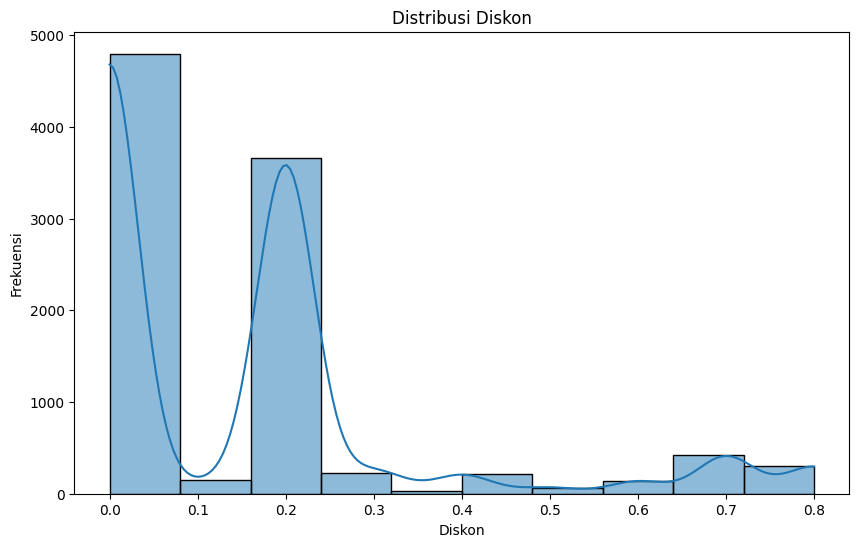

In [52]:
# Distribusi Diskon
plt.figure(figsize=(10, 6))
sns.histplot(discTable['Discount'], kde=True, bins=10)
plt.title("Distribusi Diskon")
plt.xlabel("Diskon")
plt.ylabel("Frekuensi")
plt.show()

Dari tabel dan grafik diatas, diskon berpusat pada nilai tertentu. Transaksi penjualan banyak dilakukan tanpa adanya potongan diskon, kemudian transaksi terbanyak kedua diikuti dengan potongan diskon 20%. Artinya selama ini SparksHUB sering memberikan diskon di angka tersebut.

Walau SparksHUB sering memberikan diskon di angka 20%, apakah hal tersebut yang menjadi pengaruh signifikan penurunan profit? Untuk itu kita perlu analisis lanjut. Seperti yang kita lihat, angka diskon bervariatif mulai dari 0.0 sampai 0.8. Disini kita akan membuat tingkatan diskon (Low, Medium, High) untuk dilihat lebih lanjut positif terhadap penjualan dan sales.

Angka diskon berada pada rentang 0-1 (0-100%), berikut pembagiannya:

- Low (Rendah): Diskon dari 0 hingga 33 (sekitar sepertiga dari rentang 0-100).
- Medium (Sedang): Diskon dari 34 hingga 66 (sepertiga berikutnya dari rentang).
- High (Tinggi): Diskon dari 67 hingga 100 (sepertiga terakhir).


In [53]:
# Pengelompokan Berdasarkan Tingkat Diskon
discTable['Discount_Category'] = pd.cut(discTable['Discount'], bins=[-0.01, 0.33, 0.66, 1], labels=['Low', 'Medium', 'High'])
# Melakukan uji normalitas di setiap kategori diskon untuk kolom Sales dan Profit
grouped_results = {}
for category in ['Low', 'Medium', 'High']:  # Menggunakan urutan yang konsisten
    sales_data = discTable[discTable['Discount_Category'] == category]['Sales']
    profit_data = discTable[discTable['Discount_Category'] == category]['Profit']
    
    # Uji normalitas
    sales_normality = shapiro(sales_data).pvalue > 0.05
    profit_normality = shapiro(profit_data).pvalue > 0.05
    
    # Menghitung mean atau median berdasarkan normalitas
    sales_stat = sales_data.mean() if sales_normality else sales_data.median()
    profit_stat = profit_data.mean() if profit_normality else profit_data.median()
    
    # Simpan hasil
    grouped_results[category] = {'Rata-Rata Sales': sales_stat, 'Rata-Rata Profit': profit_stat}

# Konversi hasil ke dalam DataFrame
grouped_disc = pd.DataFrame.from_dict(grouped_results, orient='index').reset_index()
grouped_disc.columns = ['Discount_Category', 'Rata-Rata Sales', 'Rata-Rata Profit']

# Pastikan pengurutan kategori diskon
grouped_disc = grouped_disc.sort_values(by='Discount_Category', key=lambda x: x.map({'Low': 0, 'Medium': 1, 'High': 2}))

# Tampilkan hasil
grouped_disc

,Discount_Category,Rata-Rata Sales,Rata-Rata Profit
0,Low,59.700,10.8864
1,Medium,154.764,-46.7970
2,High,10.780,-11.4924


Dalam bentuk visual seperti berikut:

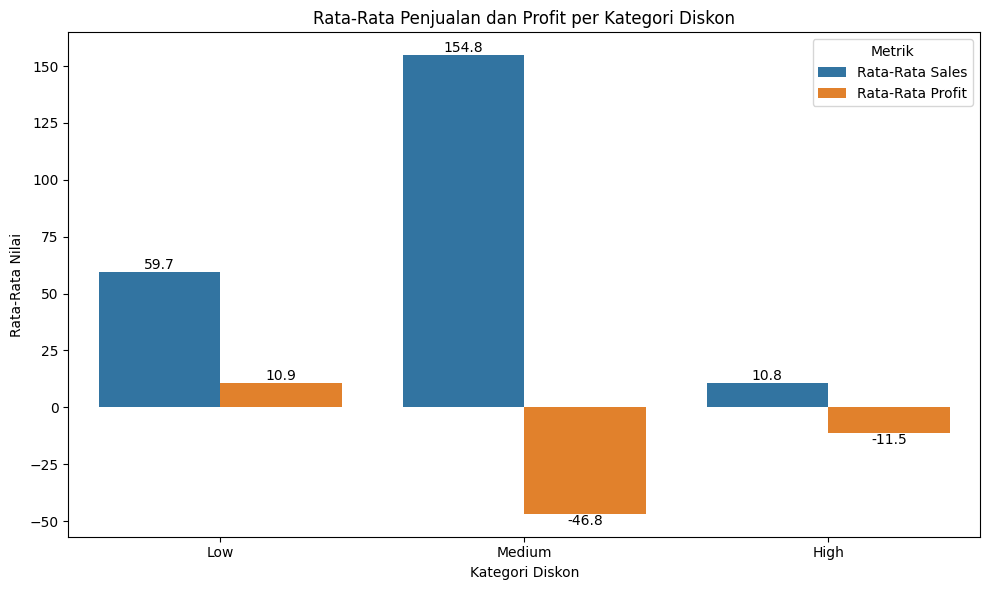

In [54]:
# Membuat clustered bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Melted data agar bisa menggunakan sns.barplot dengan hue untuk clustered bars
melted_disc = grouped_disc.melt(id_vars='Discount_Category', var_name='Metric', value_name='Value')

# Plot clustered bar chart
sns.barplot(data=melted_disc, x='Discount_Category', y='Value', hue='Metric', ax=ax, errorbar=('ci', 0))

# Menambahkan anotasi pada setiap bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')

# Mengatur judul dan label
plt.title('Rata-Rata Penjualan dan Profit per Kategori Diskon')
plt.xlabel('Kategori Diskon')
plt.ylabel('Rata-Rata Nilai')
plt.legend(title='Metrik')
plt.tight_layout()
plt.show()


Dari yang kita lihat, diskon Low (0-33%) memberikan rata-rata penjualan dan profit yang moderat (10.9), yang artinya, diskon rendah lebih aman karena memberi efek positif ke Penjualan serta Profit.

Diskon Medium (34% - 66%) menghasilkan penjualan yang sangat tinggi (154.8) namun margin keuntungan per unit yang didapatkan dari transaksi tersebut menurun bahkan negatif. Hal ini menunjukkan bahwa meskipun SparksHUB berhasil menjual lebih banyak produk dengan diskon dalam rentang medium, keuntungan yang dihasilkan sangat rendah.

Diskon High (67%-100%) menghasilkan penjualan yang rendah dan profit yang lebih rendah lagi. Artinya diskon tinggi tidak hanya mengurangi margin tetapi juga menghasilkan kerugian.

Dari sini kita mengetahui bahwa angka diskon yang sering SparksHUB berikan (20%) termasuk dalam tingkat Diskon Low, yang artinya memberikan rata-rata penjualan dan profit yang cukup.Yang perlu dievaluasi lanjut oleh SparksHUB adalah tentang diskon yang lebih besar dari Low (Medium dan High) karena memberikan efek negatif sehingga menurunkan profit.

----------------------------------------------------------------------------

Dari tabel, uji statistik dan grafik yang telah kita buat ini, maka kita bisa menjawab pertanyaan:

**Pertanyaan Seberapa efektif strategi diskon saat ini dalam meningkatkan volume penjualan tanpa mengorbankan profitabilitas? Apakah ada nominal diskon tertentu yang optimal bagi perusahaan?**

* Secara keseluruhan, strategi diskon saat ini cenderung kurang efektif karena Diskon dalam tingkat Low (0-33%) yang sering diberikan tidak signifikan dalam meningkatkan volume penjualan. Sedangkan tingkat diskon menengah dan tinggi (34% - 100%) lebih cenderung mengorbankan profitabilitas.

* Namun, Diskon tingkat Low (0-33%) tampak paling optimal diantara yang lain untuk mempertahankan profitabilitas sambil tetap mendorong penjualan. Sebagai langkah selanjutnya, perusahaan dapat mempertimbangkan untuk membatasi diskon pada tingkat yang lebih rendah guna menghindari kerugian dan memaksimalkan margin keuntungan.

----------------------------------------------------------------------------

## Profitabilitas Berdasarkan Segmen Pelanggan

Setelah mengetahui efektivitas diskon terhadap Penjualan dan Profitabilitas, kita akan melihat bagaimana kedua hal tersebut berdasarkan segmen pelanggan. Hal ini dilakukan untuk mengetahui apakah ada segmen tertentu yang memberikan kontribusi positif terhadap perusahan atau ada yg perlu di tingkatkan.

In [55]:
segmenTable = cleanedData

Untuk itu kita akan memulai dengan menghitung rata-rata penjualan dan profit tiap segmen. Seperti yang kita lihat dibawah ini, segmen pelanggan SparksHUB terbagi menjadi 3 kategori, yaitu SMB, Strategic dan Enterprise.

In [56]:
segmenTable['Segment'].unique()

array(['SMB', 'Strategic', 'Enterprise'], dtype=object)

Kita filter dataset per segmen nya agar mudah untuk di uji normalitas nya. Kita perlu Uji Normalitas tiap segmen karena akan menghitung rata-rata, yang mana penggunaan mean atau median sebagai pusat data, tergantung dari distribusi data tersebut.

In [57]:
# Filter data untuk setiap segmen
smb_data = segmenTable[segmenTable['Segment'] == 'SMB']
str_data = segmenTable[segmenTable['Segment'] == 'Strategic']
ent_data = segmenTable[segmenTable['Segment'] == 'Enterprise']

In [58]:
# Uji Normalitas Penjualan tiap Segment

stat_salesSMB, pval_salesSMB = shapiro(smb_data['Sales'])
if pval_salesSMB < 0.05:
    print(f'Variable tidak berdistribusi normal (Tolak H0)')
else:
    print(f'Variable berdistribusi normal (Gagal Tolak H0)')

print(pval_salesSMB)

stat_salesSTR, pval_salesSTR = shapiro(str_data['Sales'])
if pval_salesSTR < 0.05:
    print(f'Variable tidak berdistribusi normal (Tolak H0)')
else:
    print(f'Variable berdistribusi normal (Gagal Tolak H0)')

print(pval_salesSTR)

stat_salesENT, pval_salesENT = shapiro(ent_data['Sales'])
if pval_salesENT < 0.05:
    print(f'Variable tidak berdistribusi normal (Tolak H0)')
else:
    print(f'Variable berdistribusi normal (Gagal Tolak H0)')

print(pval_salesENT)

Variable tidak berdistribusi normal (Tolak H0)
4.350911863214606e-87
Variable tidak berdistribusi normal (Tolak H0)
1.1166431639852853e-73
Variable tidak berdistribusi normal (Tolak H0)
1.9254840074089453e-64


In [59]:
# Uji Normalitas Profit tiap Segment

stat_profitSMB, pval_profitSMB = shapiro(smb_data['Profit'])
if pval_profitSMB < 0.05:
    print(f'Variable tidak berdistribusi normal (Tolak H0)')
else:
    print(f'Variable berdistribusi normal (Gagal Tolak H0)')

print(pval_profitSMB)

stat_profitSTR, pval_profitSTR = shapiro(str_data['Profit'])
if pval_profitSTR < 0.05:
    print(f'Variable tidak berdistribusi normal (Tolak H0)')
else:
    print(f'Variable berdistribusi normal (Gagal Tolak H0)')

print(pval_profitSTR)

stat_profitNT, pval_profitENT = shapiro(ent_data['Profit'])
if pval_profitENT < 0.05:
    print(f'Variable tidak berdistribusi normal (Tolak H0)')
else:
    print(f'Variable berdistribusi normal (Gagal Tolak H0)')

print(pval_profitENT)

Variable tidak berdistribusi normal (Tolak H0)
1.5348986272845236e-90
Variable tidak berdistribusi normal (Tolak H0)
1.636166756186775e-76
Variable tidak berdistribusi normal (Tolak H0)
2.1549648684384106e-62


Dari kedua Uji Normalitas diatas, Penjualan dan Profit tiap segmen pelanggan berdistribusi tidak normal, maka kita akan menggunakan median sebagai pusat data.

In [60]:
print('TABEL 1. Rata-rata Penjualan & Profit tiap Segmen Pelanggan')
segmentedData = pd.DataFrame({
    'Segmen Pelanggan': segmenTable['Segment'].unique(),
    'Rata-Rata Penjualan': [smb_data['Sales'].median(), str_data['Sales'].median(), ent_data['Sales'].median()],
    'Rata-Rata Profit': [smb_data['Profit'].median(), str_data['Profit'].median(), ent_data['Profit'].median()]
})

# Menampilkan hasil
segmentedData = segmentedData.reset_index(drop=True)
segmentedData

segmentedData

TABEL 1. Rata-rata Penjualan & Profit tiap Segmen Pelanggan


,Segmen Pelanggan,Rata-Rata Penjualan,Rata-Rata Profit
0,SMB,53.72,8.3754
1,Strategic,56.54,8.6940
2,Enterprise,52.44,9.1020


Diatas kita telah mendapatkan tabel Rata-Rata Penjualan dan Profit tiap Segmen Pelanggan. Agar terlihat lebih jelas, kita akan memvisualisasikan menggunakan barplot dibawah: 

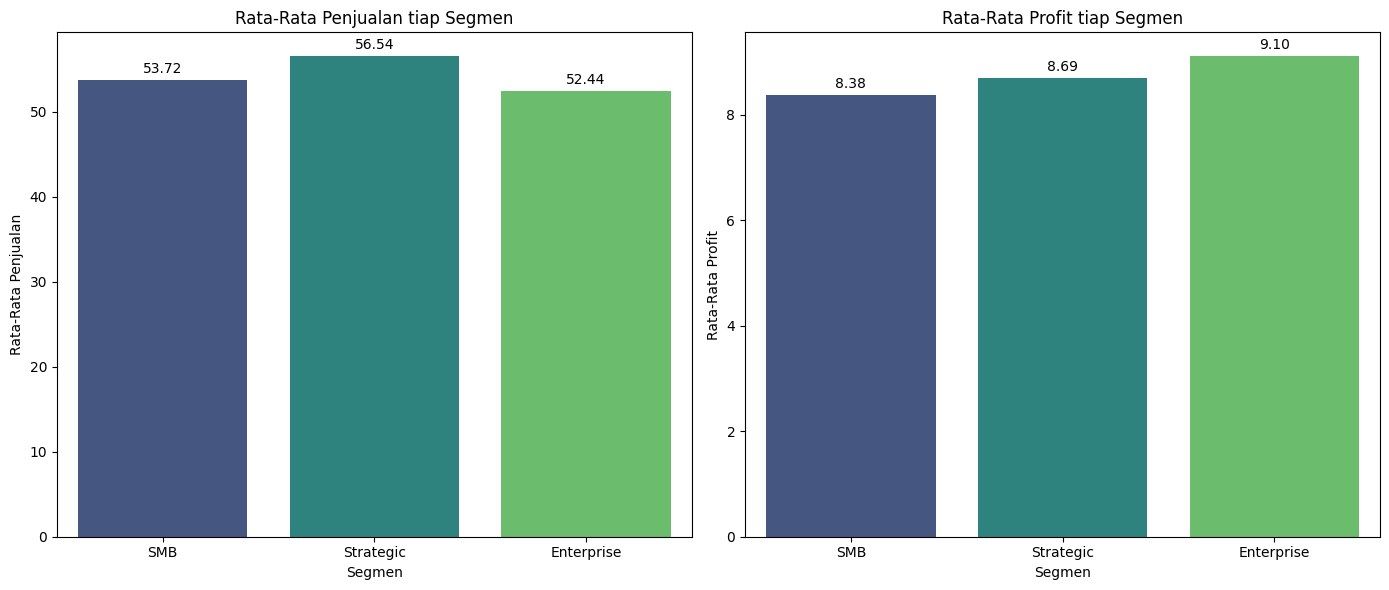

In [61]:
# Membuat gambar dan subplot
plt.figure(figsize=(14, 6))

# Subplot pertama: Bar chart untuk Penjualan
plt.subplot(1, 2, 1)
sns.barplot(data=segmentedData, x='Segmen Pelanggan', y='Rata-Rata Penjualan', palette='viridis')

# Menambahkan anotasi untuk Penjualan
for bar in plt.gca().patches:
    plt.gca().annotate(
        format(bar.get_height(), '.2f'), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
        ha='center', va='center', size=10, 
        xytext=(0, 8), textcoords='offset points'
    )
plt.title('Rata-Rata Penjualan tiap Segmen')
plt.xlabel('Segmen')
plt.ylabel('Rata-Rata Penjualan')

# Subplot kedua: Bar chart untuk Profit
plt.subplot(1, 2, 2)
sns.barplot(data=segmentedData, x='Segmen Pelanggan', y='Rata-Rata Profit', palette='viridis')

# Menambahkan anotasi untuk Profit
for bar in plt.gca().patches:
    plt.gca().annotate(
        format(bar.get_height(), '.2f'), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
        ha='center', va='center', size=10, 
        xytext=(0, 8), textcoords='offset points'
    )
plt.title('Rata-Rata Profit tiap Segmen')
plt.xlabel('Segmen')
plt.ylabel('Rata-Rata Profit')

# Menyempurnakan layout agar tidak bertumpuk
plt.tight_layout()

# Menampilkan gambar
plt.show()


Dari dua grafik barplot diatas, untuk Penjualan, Strategic memiliki rata-rata penjualan tertinggi (56.54), diikuti oleh SMB (53.72), dan Enterprise (52.44). Ini menunjukkan bahwa segmen Strategic berkontribusi lebih banyak terhadap penjualan dibandingkan dua segmen lainnya, meskipun perbedaannya tidak terlalu besar. Kemudian, untuk Profit, Enterprise menunjukkan profit yang sedikit lebih tinggi (9.10) dibandingkan SMB (8.38) dan Strategic (8.69).

Meskipun segmen Strategic memiliki penjualan yang lebih tinggi, Enterprise memberikan kontribusi lebih besar terhadap profit. Ini bisa mengindikasikan bahwa meskipun penjualannya lebih rendah, margin profit untuk Enterprise lebih baik, atau biaya terkait dengan penjualan di segmen ini lebih rendah.

Untuk lebih memastikan hasil visualisasi tersebut, kita perlu menguji secara statistik perbedaan rata-rata penjualan dan profit antar segmen ini. Di awal tadi kita telah melakukan uji normalitas Penjualan dan Profit tiap segment, yang mana kedua nya tidak berdistribusi normal. Jadi kita lanjutkan Hipotesis dan Uji Hipotesis nya:

Hipotesis Penjualan antar Segment

- H0: Rata-rata Penjualan di semua segmen pelanggan adalah sama.
- H1: Terdapat perbedaan rata-rata Penjualan antara satu atau lebih segmen pelanggan.

Uji Hipotesis Penjualan antar Segment

In [62]:
# Menggunakan kruskal utuk menguji perbedaan antara lebih dari dua grup independen yang tidak berdistribusi normal
stat_tip, pval_tipday = kruskal(smb_data['Sales'],
                               str_data['Sales'],
                               ent_data['Sales'])

if pval_tipday < 0.05:
    pval_tipday
    print(f'karena P-Value ({pval_tipday}) < 0.05 (5%), \nmaka Tolak H0')
else:
    pval_tipday
    print(f'karena P-Value ({pval_tipday}) > 0.05 (5%), \nmaka Gagal Tolak H0')

karena P-Value (0.7103020663105177) > 0.05 (5%), 
maka Gagal Tolak H0


Hipotesis Profit antar Segment

- H0: Rata-rata Profit di semua segmen pelanggan adalah sama.
- H1: Terdapat perbedaan Profit rata-rata antara satu atau lebih segmen pelanggan.

Hasil Uji Hipotesis Diskon terhadap Penjualan

Gagalnya uji Kruskal-Wallis untuk menolak H0 berarti **tidak ada bukti statistik yang cukup untuk menyatakan bahwa perbedaan antar segmen dalam hal penjualan secara signifikan**. Artinya, tidak ada alasan kuat untuk mengatakan bahwa satu segmen lebih menguntungkan atau menghasilkan penjualan lebih tinggi dari segmen lainnya.

Lalu, apakah ada perbedaan antar segmen dalam hal profit? Kita lanjutkan Uji Statistik nya:

Uji Hipotesis Penjualan antar Segment

In [63]:
# Menggunakan kruskal utuk menguji perbedaan antara lebih dari dua grup independen yang tidak berdistribusi normal
stat_tip, pval_tipday = kruskal(smb_data['Profit'],
                               str_data['Profit'],
                               ent_data['Profit'])

if pval_tipday < 0.05:
    pval_tipday
    print(f'karena P-Value ({pval_tipday}) < 0.05 (5%), \nmaka Tolak H0')
else:
    pval_tipday
    print(f'karena P-Value ({pval_tipday}) > 0.05 (5%), \nmaka Gagal Tolak H0')

karena P-Value (0.11231174553413312) > 0.05 (5%), 
maka Gagal Tolak H0


Ternyata hasilnya juga sama, Gagal Tolak H0 yang artinya **tidak ada perbedaan signifikan antar segmen pelanggan terhadap profit yang dihasilkan**.

Dari tabel dan grafik yang kita hasilkan, segmen Enterprise memiliki rata-rata penjualan dan profit yang sedikit lebih tinggi daripada segmen lainnya, namun secara Uji Statistik, perbedaan tersebut bisa saja terjadi karena kebetulan (random chance) karena tidak signifikan.

----------------------------------------------------------------------------

Untuk itu, kita menjawab pertanyaan:

**Berdasarkan segmen pelanggan (SMB, Strategis, Enterprise) mana yang memberikan kontribusi terbesar terhadap pendapatan? Apa strategi yang dapat meningkatkan nilai dari setiap segmen ini?**

* Tidak ada segmen yang lebih menguntungkan secara signifikan antar segmen lain terhadap perusahaan. Semua segmen berkontribusi sama secara penjualan dan profitabilitas.
* Oleh karena itu, kita bisa fokus pada pengoptimalan dalam setiap segmen tanpa perlu khawatir ada segmen yang lebih unggul secara signifikan.

----------------------------------------------------------------------------

## Analisis Profit & Penjualan berdasarkan Waktu dan Wilayah

Analisis ini dapat memberikan informasi kapan dan dimana profit serta sales SparksHUB mencapai puncaknya serta pola umum dari profit dan sales berdasarkan waktu tertentu. Ini membantu SparksHUB membuat keputusan pemasaran yang lebih terarah sehingga mengoptimalkan pendapatan.

In [64]:
trenTable = cleanedData

Sekarang, kita akan menghitung total profit dan total sales untuk tiap bulan, kuartal dan tahun guna melihat apakah terdapat bulan atau kuartal tertentu yang berkontribusi positif terhadap pendapatan (misalnya musim liburan atau akhir tahun).

In [65]:
# Tambah kolom Tahun, Kuartal, dan Bulan
trenTable['Tahun'] = trenTable['Date Key'].dt.year
trenTable['Kuartal'] = trenTable['Date Key'].dt.quarter
trenTable['Bulan'] = trenTable['Date Key'].dt.month

# Pilih kolom yang dibutuhkan
trenTableAgg = trenTable.groupby(['Tahun', 'Kuartal', 'Bulan','Region'])[['Sales', 'Profit']].sum().reset_index()
trenTableAgg = trenTableAgg.sort_values(by=['Tahun', 'Kuartal', 'Bulan'], ascending=True).reset_index(drop=True)

In [66]:
print('Tabel 1. Total Profit & Sales berdasarkan Waktu & Wilayah')
trenTableAgg = trenTableAgg.pivot_table(values=['Sales', 'Profit'], index=['Tahun', 'Kuartal', 'Bulan', 'Region']).sort_values(['Tahun', 'Kuartal', 'Bulan'], ascending=[True, True, True])
trenTableAgg

Tabel 1. Total Profit & Sales berdasarkan Waktu & Wilayah


Profit       Sales
Tahun Kuartal Bulan Region                       
2020  1       1     AMER     288.3753   4079.0150
                    APJ     -118.4016    448.0900
                    EMEA    2276.7974   9419.1240
              2     AMER     257.5157   1413.2060
                    APJ      -18.3004    229.0040
...                               ...         ...
2023  4       11    APJ     4753.2845  29479.5720
                    EMEA    2298.2016  48933.0920
              12    AMER    7063.9606  36180.1560
                    APJ    -3224.5566  11268.7888
                    EMEA    4693.4640  43025.6560

[144 rows x 2 columns]

In [67]:
trenTableAgg = trenTableAgg.reset_index()

Dari tabel diatas, kita sudah mengelompokkan Profit dan Sales berdasarkan kategori waktu dan region. Namun, untuk melihat secara rinci, kita akan melakukan analisis deskriptif dalam bentuk visual secara bertingkat. Pertama, kita cek dulu tahun berapa yang menghasilkan pendapatan dan penjualan tertinggi.

In [68]:
# Menghitung total Profit & Penjualan tertinggi per Tahun
salprof_per_tahun = trenTableAgg.groupby('Tahun')[['Profit','Sales']].sum().sort_values(['Profit','Sales'], ascending=[False, False]).reset_index()
print('Tabel 2. Total Profit & Sales berdasarkan Waktu')
salprof_per_tahun

Tabel 2. Total Profit & Sales berdasarkan Waktu


,Tahun,Profit,Sales
0,2023,93507.5131,733947.0232
1,2022,81726.9308,608473.8300
2,2021,61618.6037,470532.5090
3,2020,49543.9741,484247.4981


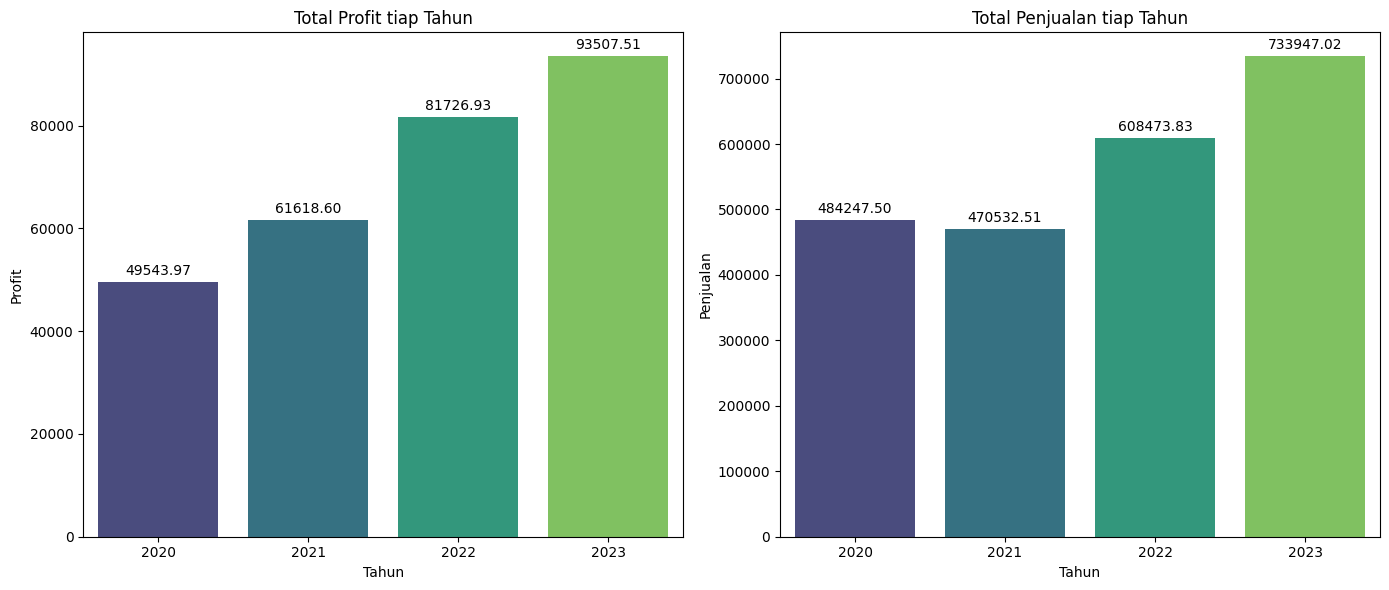

In [69]:
# Membuat gambar dan subplot
plt.figure(figsize=(14, 6))

# Subplot pertama: Bar chart untuk Profit
plt.subplot(1, 2, 1)
sns.barplot(data=salprof_per_tahun, x='Tahun', y='Profit', palette='viridis')

# Menambahkan anotasi untuk Profit
for bar in plt.gca().patches:
    plt.gca().annotate(
        format(bar.get_height(), '.2f'), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
        ha='center', va='center', size=10, 
        xytext=(0, 8), textcoords='offset points'
    )
plt.title('Total Profit tiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Profit')

# Subplot kedua: Bar chart untuk Penjualan
plt.subplot(1, 2, 2)
sns.barplot(data=salprof_per_tahun, x='Tahun', y='Sales', palette='viridis')

# Menambahkan anotasi untuk Penjualan
for bar in plt.gca().patches:
    plt.gca().annotate(
        format(bar.get_height(), '.2f'), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
        ha='center', va='center', size=10, 
        xytext=(0, 8), textcoords='offset points'
    )
plt.title('Total Penjualan tiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Penjualan')

# Menyempurnakan layout agar tidak bertumpuk
plt.tight_layout()

# Menampilkan gambar
plt.show()


Pada grafik diatas,  didapatkan bahwa tahun 2023 merupakan tahun tertinggi baik secara Profit dan Penjualan. Selanjutnya, kita akan cek, di rentang kuartal berapa Profit dan Penjualan tertinggi terjadi.

In [70]:
# Menghitung total Profit & Penjualan per Kuartal 2023
salprof_per_kuartal = trenTableAgg[trenTableAgg['Tahun']== 2023]
salprof_per_kuartal = salprof_per_kuartal.groupby('Kuartal')[['Profit','Sales']].sum().sort_values(['Profit','Sales'], ascending=[False, False]).reset_index()
print('Tabel 3. Total Profit & Sales berdasarkan Kuartal 2023')
salprof_per_kuartal

Tabel 3. Total Profit & Sales berdasarkan Kuartal 2023


,Kuartal,Profit,Sales
0,4,27656.0807,280594.8270
1,3,26913.4451,200433.1730
2,1,21772.2303,118895.6174
3,2,17165.7570,134023.4058


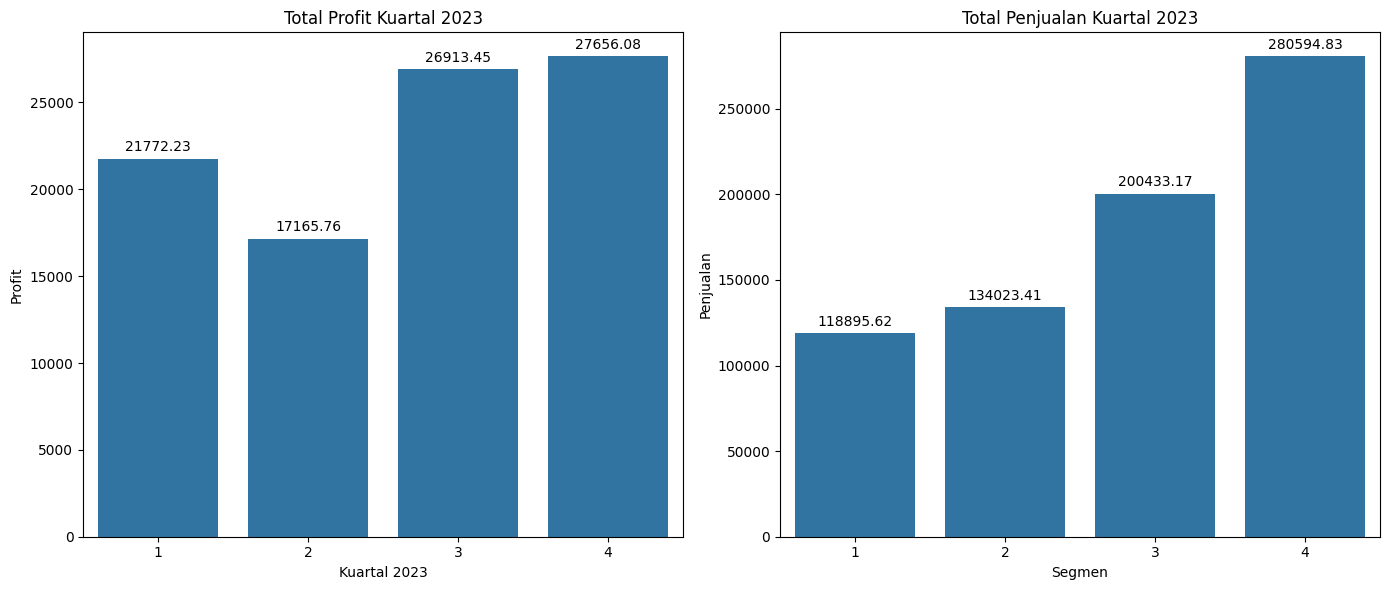

In [71]:
# Membuat gambar dan subplot
plt.figure(figsize=(14, 6))

# Subplot pertama: Bar chart untuk Profit
plt.subplot(1, 2, 1)
sns.barplot(data=salprof_per_kuartal, x='Kuartal', y='Profit')

# Menambahkan anotasi untuk Profit
for bar in plt.gca().patches:
    plt.gca().annotate(
        format(bar.get_height(), '.2f'), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
        ha='center', va='center', size=10, 
        xytext=(0, 8), textcoords='offset points'
    )
plt.title('Total Profit Kuartal 2023')
plt.xlabel('Kuartal 2023')
plt.ylabel('Profit')

# Subplot kedua: Bar chart untuk Penjualan
plt.subplot(1, 2, 2)
sns.barplot(data=salprof_per_kuartal, x='Kuartal', y='Sales')

# Menambahkan anotasi untuk Penjualan
for bar in plt.gca().patches:
    plt.gca().annotate(
        format(bar.get_height(), '.2f'), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
        ha='center', va='center', size=10, 
        xytext=(0, 8), textcoords='offset points'
    )
plt.title('Total Penjualan Kuartal 2023')
plt.xlabel('Segmen')
plt.ylabel('Penjualan')

# Menyempurnakan layout agar tidak bertumpuk
plt.tight_layout()

# Menampilkan gambar
plt.show()


Dari grafik diatas, dapat kita lihat bahwa Kuartal ke-4 2023 terjadinya Profit dan Penjualan tertinggi. Kuartal ke-4 terdiri dari data transaksi di bulan Oktober, November dan Desember.

Lanjut, kita akan cek total Profit dan total Penjualan di bulan-bulan tersebut.

In [72]:
# Menghitung total Profit & Penjualan per Bulan
salprof_per_bulan = trenTableAgg[(trenTableAgg['Tahun']== 2023) & (trenTableAgg['Kuartal']== 4) & (trenTableAgg['Bulan']> 9)]
salprof_per_bulan = salprof_per_bulan.groupby('Bulan')[['Profit','Sales']].sum().sort_values(['Profit','Sales'], ascending=[False, False]).reset_index()
print('Tabel 4. Total Profit & Sales berdasarkan Q4 2023')
salprof_per_bulan

Tabel 4. Total Profit & Sales berdasarkan Q4 2023


,Bulan,Profit,Sales
0,11,9682.5519,112326.4710
1,10,9440.6608,77793.7552
2,12,8532.8680,90474.6008


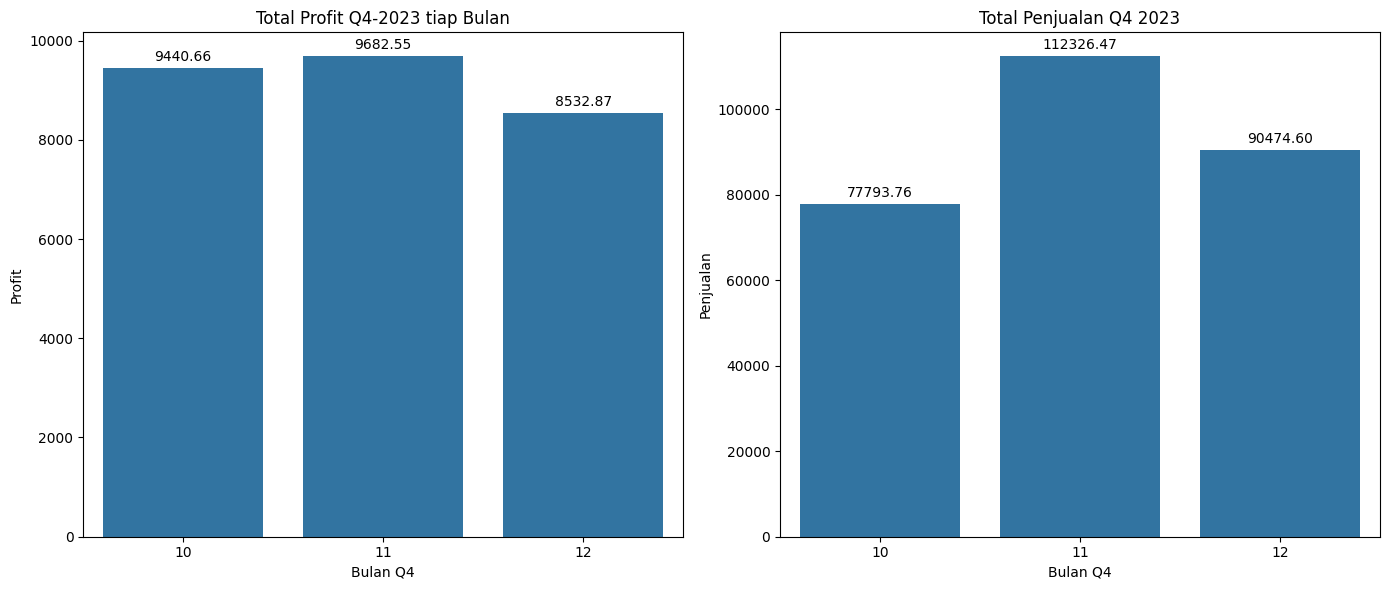

In [73]:
# Membuat gambar dan subplot
plt.figure(figsize=(14, 6))

# Subplot pertama: Bar chart untuk Profit
plt.subplot(1, 2, 1)
sns.barplot(data=salprof_per_bulan, x='Bulan', y='Profit')

# Menambahkan anotasi untuk Profit
for bar in plt.gca().patches:
    plt.gca().annotate(
        format(bar.get_height(), '.2f'), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
        ha='center', va='center', size=10, 
        xytext=(0, 8), textcoords='offset points'
    )
plt.title('Total Profit Q4-2023 tiap Bulan')
plt.xlabel('Bulan Q4')
plt.ylabel('Profit')

# Subplot kedua: Bar chart untuk Penjualan
plt.subplot(1, 2, 2)
sns.barplot(data=salprof_per_bulan, x='Bulan', y='Sales')

# Menambahkan anotasi untuk Penjualan
for bar in plt.gca().patches:
    plt.gca().annotate(
        format(bar.get_height(), '.2f'), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
        ha='center', va='center', size=10, 
        xytext=(0, 8), textcoords='offset points'
    )
plt.title('Total Penjualan Q4 2023')
plt.xlabel('Bulan Q4')
plt.ylabel('Penjualan')

# Menyempurnakan layout agar tidak bertumpuk
plt.tight_layout()

# Menampilkan gambar
plt.show()


Nah, dapat kita ketahui bahwa di bulan November lah total Profit serta total Penjualan tertinggi. Maka dari itu, kita mendapatkan informasi lengkap kapan puncak Profit dan Sales yaitu November, 2023.

Sekarang, kita analisis pada waktu tersebut, region mana yang berperan dalam Profit dan Penjualan.

In [74]:
# Menghitung total Profit & Penjualan per Bulan
salprof_per_region = trenTableAgg[(trenTableAgg['Tahun']== 2023) & (trenTableAgg['Kuartal']== 4) & (trenTableAgg['Bulan'] == 11)]
salprof_per_region = salprof_per_region.groupby('Region')[['Profit','Sales']].sum().sort_values(['Profit','Sales'], ascending=[False, False]).reset_index()
# Menentukan urutan kategori dataset diatas
region_order = salprof_per_region['Region'].tolist()
print('Tabel 5. Total Profit & Sales berdasarkan Wilayah')
salprof_per_region

Tabel 5. Total Profit & Sales berdasarkan Wilayah


,Region,Profit,Sales
0,APJ,4753.2845,29479.572
1,AMER,2631.0658,33913.807
2,EMEA,2298.2016,48933.092


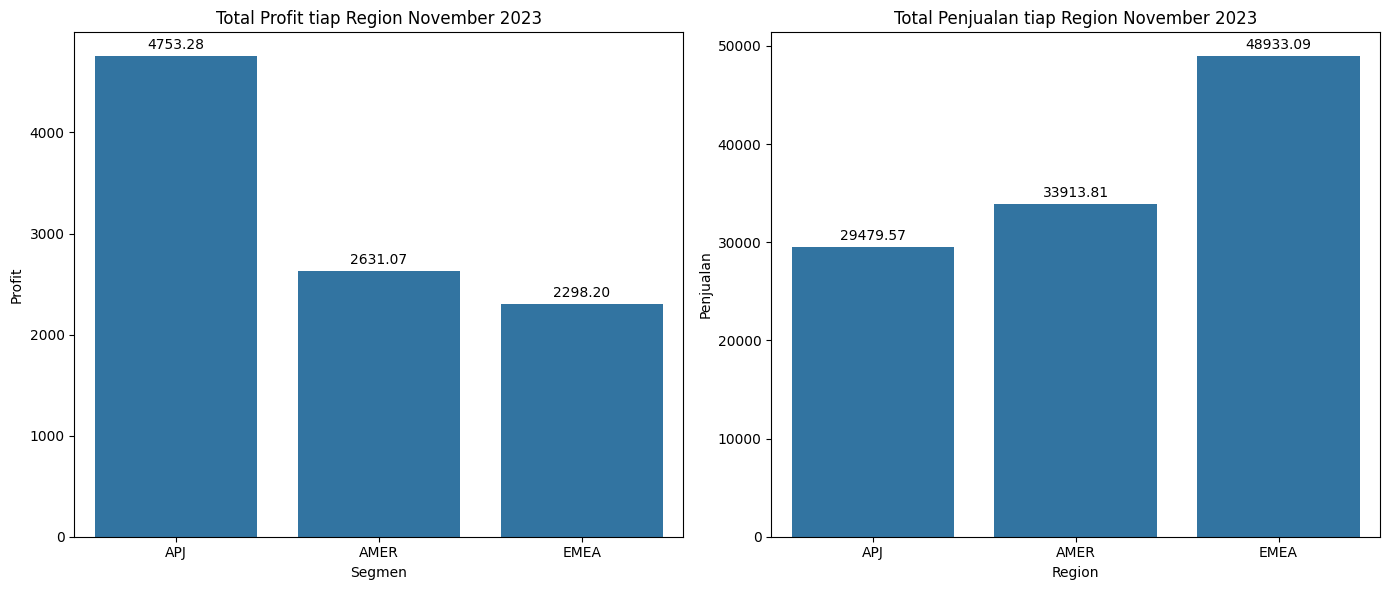

In [75]:
# Membuat gambar dan subplot
plt.figure(figsize=(14, 6))

# Subplot pertama: Bar chart untuk Profit
plt.subplot(1, 2, 1)
sns.barplot(data=salprof_per_region, x='Region', y='Profit', order=region_order)

# Menambahkan anotasi untuk Profit
for bar in plt.gca().patches:
    plt.gca().annotate(
        format(bar.get_height(), '.2f'), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
        ha='center', va='center', size=10, 
        xytext=(0, 8), textcoords='offset points'
    )
plt.title('Total Profit tiap Region November 2023')
plt.xlabel('Segmen')
plt.ylabel('Profit')

# Subplot kedua: Bar chart untuk Penjualan
plt.subplot(1, 2, 2)
sns.barplot(data=salprof_per_region, x='Region', y='Sales', order=region_order)

# Menambahkan anotasi untuk Penjualan
for bar in plt.gca().patches:
    plt.gca().annotate(
        format(bar.get_height(), '.2f'), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
        ha='center', va='center', size=10, 
        xytext=(0, 8), textcoords='offset points'
    )
plt.title('Total Penjualan tiap Region November 2023')
plt.xlabel('Region')
plt.ylabel('Penjualan')

# Menyempurnakan layout agar tidak bertumpuk
plt.tight_layout()

# Menampilkan gambar
plt.show()


Dari sini kita ketahui, secara wilayah, APJ adalah (Asia Pacific and Japan) region yang menghasilkan profit tertinggi dan EMEA (Europe, Middle East, and Africa) adalah region yang menghasilkan penjualan terbanyak. Artinya, walau penjualan produk di region APJ tidak sebesar region lain, profit yang didapatkan sangat signifikan terhadap pendapatan. Sedangkan di EMEA, total penjualan sangat banyak namun profit yang dihasilkan kecil. Faktor diskon yang diberikan pada produk yang dibeli oleh pelanggan, mungkin berpengaruh terhadap pendapatan yang dihasilkan dari tiap penjualan.

Nah setelah mengetahui kapan dan dimana wilayah terjadinya puncak pendapatan dan penjualan pada SparksHUB, kita analisis pola umum dari Profit dan Sales untuk melihat apakah ada periode waktu tertentu yang mengalami peningkatan atau penurunan, serta mengidentifikasi penyebabnya.

Disini, kita akan membandingkan Total Pendapatan dan Total Penjualan per-kuartal setiap tahun terhadap Total Diskon yang diberikan ke pelanggan. Menggunakan total diskon karena nilai tersebut menunjukkan besarnya dorongan yang diberikan untuk merangsang penjualan, sehingga lebih cocok dibanding menggunakan rata-rata. Dengan ini, total diskon dapat mengidentifikasi kuartal mana penjualan meningkat atau menurun akibat diskon besar.

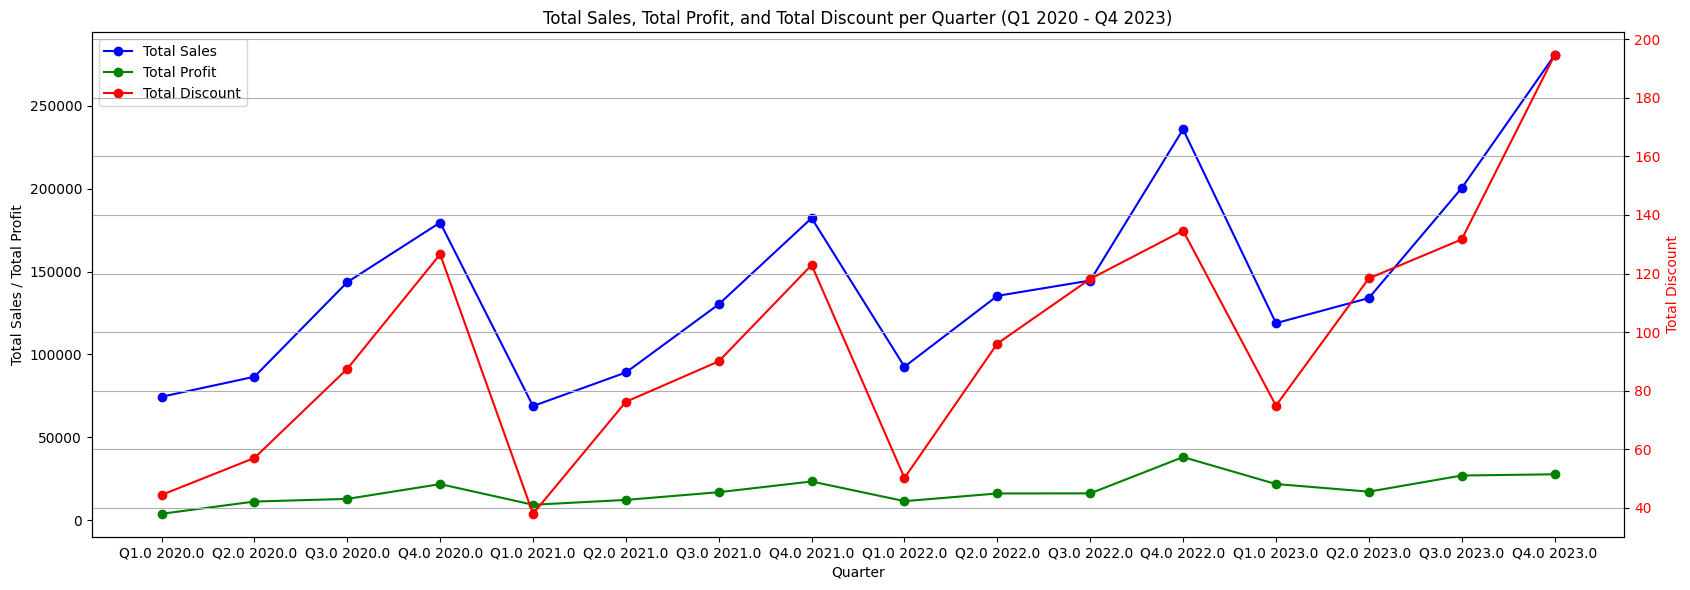

In [76]:
data = trenTable
# Buat kolom 'Year' dan 'Quarter'
data['Year'] = data['Date Key'].dt.year
data['Quarter'] = data['Date Key'].dt.quarter

# Agregasi total penjualan, total profit, dan total diskon per kuartal dan tahun
aggregated_data = data.groupby(['Year', 'Quarter']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'sum'
}).reset_index()

# Buat kolom waktu untuk sumbu x yang berformat Q1 2020 - Q4 2023
aggregated_data['Time'] = aggregated_data.apply(lambda row: f"Q{row['Quarter']} {row['Year']}", axis=1)

# Plot data
fig, ax1 = plt.subplots(figsize=(17, 6))

# Plot Total Sales dan Profit di sumbu y pertama (Sales & Profit)
ax1.plot(aggregated_data['Time'], aggregated_data['Sales'], marker='o', color='b', label='Total Sales')
ax1.plot(aggregated_data['Time'], aggregated_data['Profit'], marker='o', color='g', label='Total Profit')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Total Sales / Total Profit', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Sumbu y sekunder untuk Total Discount
ax2 = ax1.twinx()
ax2.plot(aggregated_data['Time'], aggregated_data['Discount'], marker='o', color='r', label='Total Discount')
ax2.set_ylabel('Total Discount', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Tambahkan legenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Rotasi label x agar lebih mudah dibaca
plt.xticks(rotation=90, ha='right')
plt.title('Total Sales, Total Profit, and Total Discount per Quarter (Q1 2020 - Q4 2023)')
plt.grid(True)
plt.tight_layout()
plt.show()


Dari data diatas, dapat kita lihat bahwa Pendapatan dan Penjualan berbanding lurus dengan Diskon yang diberikan. Dapat kita lihat **pola umum nya, setiap kuartal ke-4 dibulan Oktober sampai Desember, terjadi peningkatan volume penjualan dan kenaikan profit dari waktu sebelumnya setiap tahun**. Hal itu diikuti juga dengan total diskon yang diberikan ke pelanggan. Di grafik tersebut, kita ketahui bahwa profit yang dihasilkan masih sedikit, dibandingkan dengan penjualan dan diskon yang diberikan.

Nah dapat kita simpulkan disini bahwa puncak profit dan penjualan yang terjadi di November 2023 wilayah APJ dan AMER tadi dikarenakan diskon yang diberikan paling tinggi diantara tahun-tahun sebelumnya. APJ menghasilkan profit yang signifikan dibanding AMER, walau AMER mengalami penjualan yang paling besar. Namun secara keseluruhan, profit pada tahun 2023 tidak sebanyak tahun 2022. Ini mengindikasikan, diskon yang diadakan belum efektif.

----------------------------------------------------------------------------

Dengan Analisis deskriptif secara tabel dan grafik yang kita hasilkan, maka dari itu kita simpulkan dengan menjawab pertanyaan:

**Berdasarkan demografi pelanggan, kapan dan di wilayah mana penjualan serta profit SparksHUB mencapai puncaknya, dan apakah terdapat pola musiman yang dapat dioptimalkan untuk perencanaan pemasaran ke depan?**

* Penjualan dan Profit tertinggi di SparksHUB terjadi pada November 2023 di wilayah APJ (Asia Pacific and Japan) untuk pendapatan tertinggi dan AMER (Europe, Middle East, and Africa) untuk penjualan terbanyak.

* Terdapat pola musiman yang dilakukan oleh SparksHUB selama ini, diskon diberikan setiap kuartal ke-4 (Oktober, November dan Desember) sehingga meningkatkan penjualan dan pendapatan. Hanya saja, profit yang dihasilkan tidak sebanding karena mengalami kerugian signifikan di bulan-bulan berikutnya, terutama kuartal-1. Di perlukan pemasaran yang optimal pada kuartal lain dan diskon yang merata tidak hanya di satu waktu agar penjualan dan profit mempunyai keseimbangan.

----------------------------------------------------------------------------

## Evaluasi Industri yang Dilayani

Disini kita akan menganalisis profitabilitas berdasarkan industri yang dilayani oleh SparksHUB untuk mengetahui sektor mana yang paling menguntungkan. Data ini akan membantu tim untuk fokus pada industri yang memberikan nilai tinggi dan potensi untuk ekpansi jika ditemukan.

In [77]:
industryTable = cleanedData

Pertama, kita akan melakukan agregasi data berdasarkan kolom `Industry` untuk mendapatkan total profit di setiap industri. Ini akan menunjukkan industri mana yang memberikan kontribusi profit tertinggi secara keseluruhan. Kemudian, kita hitung jumlah transaksi tiap industri untuk mengidentifikasi sektor mana yang menunjukkan minat besar dalam menggunakan layanan SparksHUB.

In [78]:
# Agregasikan data berdasarkan industri
industryTableAgg = industryTable.groupby('Industry').agg(
    Total_Profit=('Profit', 'sum'),
    Total_Sales=('Sales', 'sum'),
    Transaction_Count=('Row ID', 'count')
).reset_index()

# Rename kolom agar lebih rapi
industryTableAgg = industryTableAgg.rename(columns={
    'Total_Profit': 'Total Profit',
    'Total_Sales': 'Total Sales',
    'Transaction_Count': 'Jumlah Transaksi'
})
# Tambahkan kolom Profit Margin (%)
industryTableAgg['Profit Margin %'] = (industryTableAgg['Total Profit'] / industryTableAgg['Total Sales']) * 100
# Sorting tabel dari Profit Margin (%) tertinggi
industryTableAgg = industryTableAgg.sort_values(by=['Profit Margin %'], ascending=False).reset_index(drop=True)
# Bulatkan float
industryTableAgg = industryTableAgg.round(2)

print('Tabel 1. Total Profit & Sales, Jumlah Transaksi dan Profit Margin %')
industryTableAgg

Tabel 1. Total Profit & Sales, Jumlah Transaksi dan Profit Margin %


,Industry,Total Profit,Total Sales,Jumlah Transaksi,Profit Margin %
0,Misc,7163.63,28591.76,107,25.05
1,Consumer Products,37018.01,224044.14,1021,16.52
2,Energy,45282.31,304644.14,1316,14.86
3,Retail,30207.82,223072.07,972,13.54
4,Manufacturing,38413.11,295192.38,1222,13.01
5,Healthcare,31969.09,273183.29,1049,11.70
6,Communications,13976.34,120962.24,593,11.55
7,Finance,50348.97,474150.48,2127,10.62
8,Tech,24615.04,263169.03,1236,9.35
9,Transportation,7402.70,90191.33,351,8.21


Selain Total Profit dan Jumlah Transaksi, kita akan menghitung profit margin per-industri dengan rumus:

$
Profit Margin= Total Profit / Total Sales * 100
$

Profit Margin (%) memberikan data seberapa besar keuntungan relatif yang dihasilkan dibandingkan dengan penjualan. Ini membantu kita memahami efisiensi profitabilitas suatu industri. Dengan menghitung Profit Margin %, kita dapat melihat industri mana yang lebih efektif dalam menghasilkan keuntungan relatif terhadap total penjualan nya.

Berikut bentuk grafik dari tabel diatas: 

In [79]:
# Membuat dataset baru
industryTableAgg1 = industryTableAgg[['Industry', 'Total Profit']]
industryTableAgg1 = industryTableAgg1.sort_values(by=['Total Profit'], ascending=False).reset_index(drop=True)
# Menentukan urutan kategori berdasarkan dataset baru
industry_order = industryTableAgg1['Industry'].tolist()

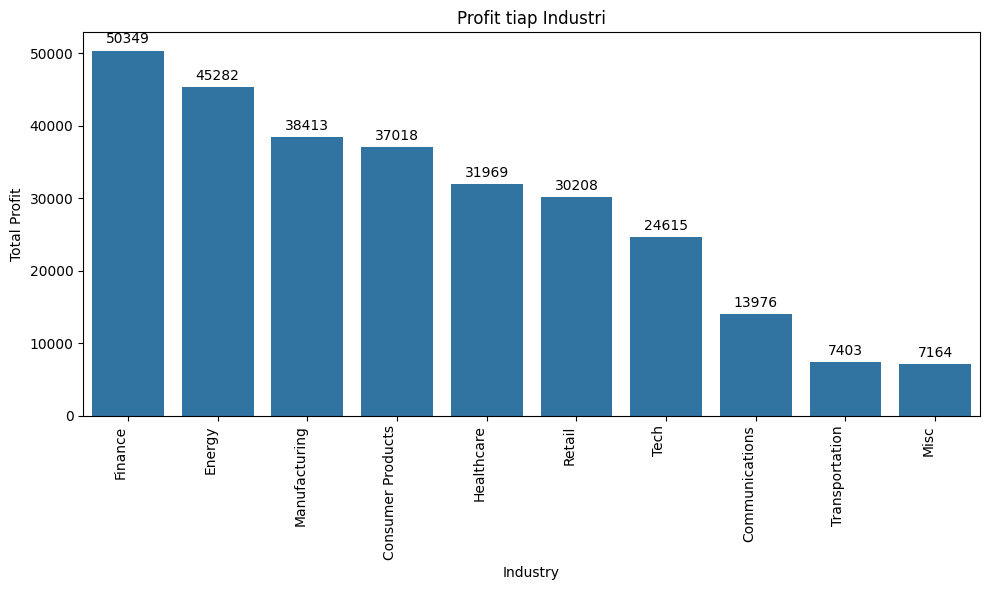

In [80]:
# Membuat bar chart
plt.figure(figsize=(10,6))

plots = sns.barplot(data=industryTableAgg1,
                    x='Industry',
                    y='Total Profit',
                    order=industry_order,  # Menentukan urutan kategori
                    errorbar=('ci', 0))

# Menambahkan anotasi pada bar chart
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=90, ha='right')
plt.title('Profit tiap Industri')
plt.tight_layout()
plt.show()


In [81]:
# Membuat dataset baru
industryTableAgg2 = industryTableAgg[['Industry', 'Jumlah Transaksi']]
industryTableAgg2 = industryTableAgg2.sort_values(by=['Jumlah Transaksi'], ascending=False).reset_index(drop=True)
# Menentukan urutan kategori berdasarkan dataset baru
industry_order = industryTableAgg2['Industry'].tolist()

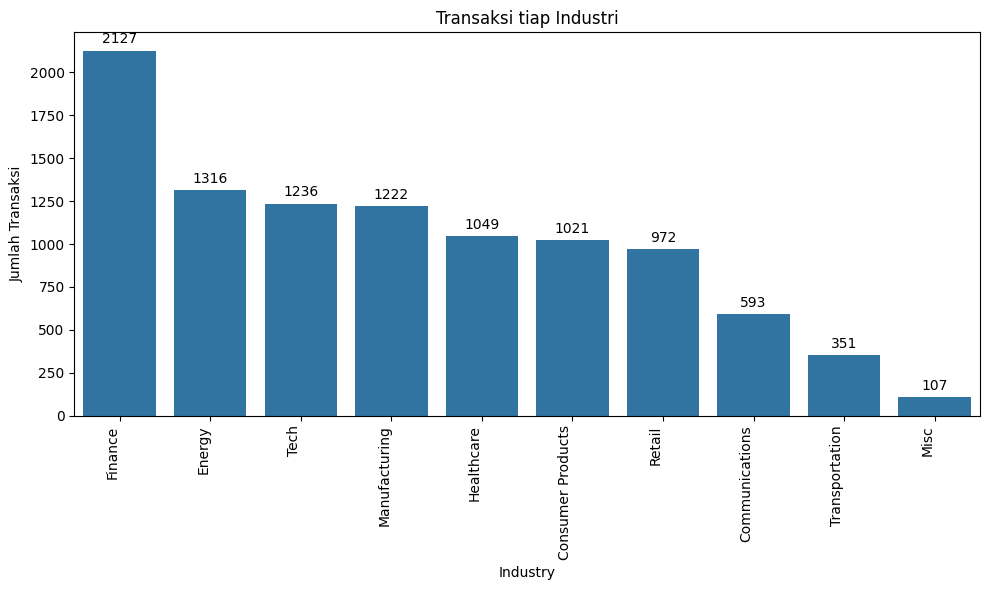

In [82]:
# Membuat bar chart
plt.figure(figsize=(10,6))

plots = sns.barplot(data=industryTableAgg2,
                    x='Industry',
                    y='Jumlah Transaksi',
                    order=industry_order,  # Menentukan urutan kategori
                    errorbar=('ci', 0))

# Menambahkan anotasi pada bar chart
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=90, ha='right')
plt.title('Transaksi tiap Industri')
plt.tight_layout()
plt.show()


In [83]:
# Membuat dataset baru
industryTableAgg3 = industryTableAgg[['Industry', 'Profit Margin %']]
industryTableAgg3 = industryTableAgg3.sort_values(by=['Profit Margin %'], ascending=False).reset_index(drop=True)
# Menentukan urutan kategori berdasarkan dataset baru
industry_order = industryTableAgg3['Industry'].tolist()

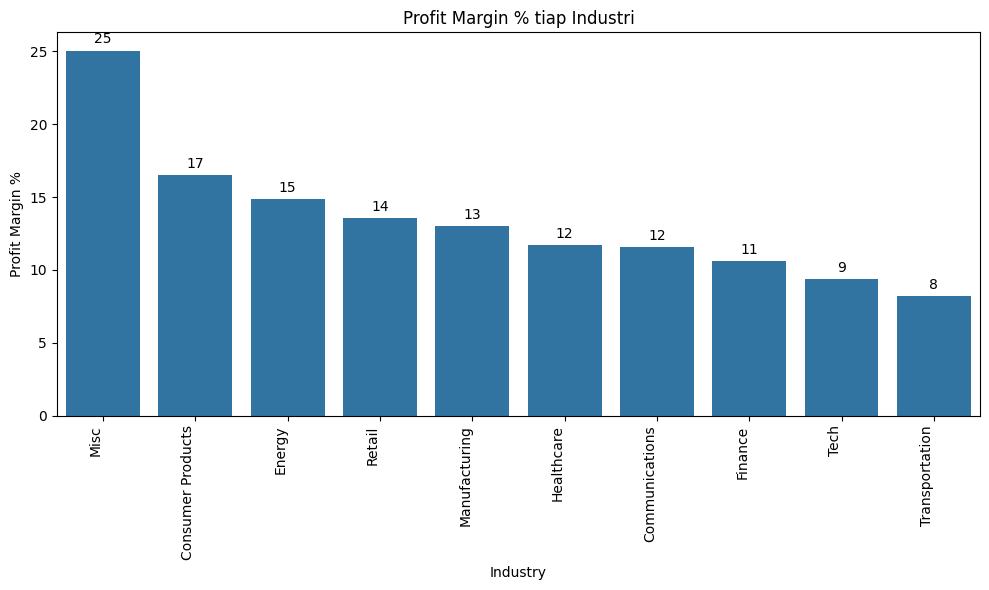

In [84]:
# Membuat bar chart
plt.figure(figsize=(10,6))

plots = sns.barplot(data=industryTableAgg3,
                    x='Industry',
                    y='Profit Margin %',
                    order=industry_order,  # Menentukan urutan kategori
                    errorbar=('ci', 0))

# Menambahkan anotasi pada bar chart
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=90, ha='right')
plt.title('Profit Margin % tiap Industri')
plt.tight_layout()
plt.show()


Dari tabel dan grafik, dapat kita simpulkan bahwa industri Finance merupakan industri yang memberikan kontribusi profit dan transaksi tertinggi secara keseluruhan. Namun, dari sisi efisiensi profitabilitas, industri Misc (Miscellaneous) lebih efektif dalam menghasilkan keuntungan terhadap total penjualan nya. Ini artinya, SparksHUB belum memaksimalkan profit untuk industri yang sering melakukan transaksi. Maka dari itu, analisis dilanjutkan untuk melihat pertumbuhan profit itu sendiri dari tahun ke tahun (dalam konteks ini, sesuai dengan Timeframe to Assume, 2020 sampai 2023). Identifikasi ini diperlukan untuk melihat industri mana yang menunjukan kenaikan profit positif secara konsisten.

Kita perlu menghitung pertumbuhan profit (Profit Growth) karena data ini menunjukkan stabil atau tidaknya peningkatan profit tiap industri untuk dilihat potensi ekspansinya lebih lanjut. Menghitung Profit Growth menggunakan fungsi pct_change() untuk mendapatkan persentase perubahan profit dari tahun sebelumnya. 

In [85]:
# Menghitung Pertumbuhan Profit dari Tahun ke Tahun
industryTableAgg['Profit Growth'] = industryTableAgg['Total Profit'].pct_change() * 100  # Persentase perubahan tahunan

# Cek apakah ada nilai NaN di kolom Profit Growth (bisa jadi krn terlalu kecil)
print(industryTableAgg['Profit Growth'].isnull().sum())

1


Dikarenakan tiap total profit industri dikalkukasi persenan (/100) profit dari tahun sebelumnya, bisa terjadi nilai yang sangat kecil hingga hampir kosong jadi membentuk NaN. Makanya perlu cek is null dan diganti saja dengan 0.

In [86]:
# Ganti nilai NaN dengan nilai 0
industryTableAgg['Profit Growth'] = industryTableAgg['Profit Growth'].fillna(0)
print('Tabel 2. Total Profit & Sales, Jumlah Transaksi, Profit Margin % & Profit Growth')
industryTableAgg

Tabel 2. Total Profit & Sales, Jumlah Transaksi, Profit Margin % & Profit Growth


,Industry,Total Profit,Total Sales,Jumlah Transaksi,Profit Margin %,Profit Growth
0,Misc,7163.63,28591.76,107,25.05,0.000000
1,Consumer Products,37018.01,224044.14,1021,16.52,416.749330
2,Energy,45282.31,304644.14,1316,14.86,22.325079
3,Retail,30207.82,223072.07,972,13.54,-33.290020
4,Manufacturing,38413.11,295192.38,1222,13.01,27.162801
5,Healthcare,31969.09,273183.29,1049,11.70,-16.775575
6,Communications,13976.34,120962.24,593,11.55,-56.281708
7,Finance,50348.97,474150.48,2127,10.62,260.244313
8,Tech,24615.04,263169.03,1236,9.35,-51.111135
9,Transportation,7402.70,90191.33,351,8.21,-69.926110


Setelah mendapatkan Profit Growth di tiap industri, sekarang kita visualisasikan dalam grafik yang dikombinasikan dengan parameter lain:

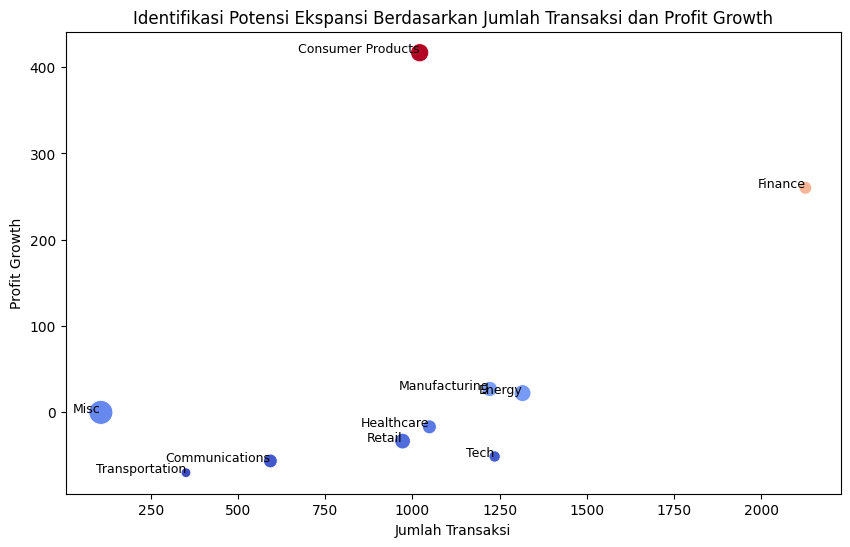

In [87]:
# Scatter Plot untuk melihat hubungan antara jumlah transaksi dan profit growth
plt.figure(figsize=(10, 6))
sns.scatterplot(data=industryTableAgg, 
                x='Jumlah Transaksi', 
                y='Profit Growth', 
                hue='Profit Growth',  # Kepekatan warna berdasarkan pertumbuhan profit
                size='Profit Margin %', # Besaran titik berdasarkan profit margin
                sizes=(50, 300), 
                palette='coolwarm',  # Pallete warna
                legend=False)

# Menambahkan anotasi untuk industri
for i in range(len(industryTableAgg)):
    plt.text(
             industryTableAgg['Jumlah Transaksi'].iloc[i], 
             industryTableAgg['Profit Growth'].iloc[i], 
             industryTableAgg['Industry'].iloc[i], 
             fontsize=9, ha='right')

plt.title('Identifikasi Potensi Ekspansi Berdasarkan Jumlah Transaksi dan Profit Growth')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Profit Growth')
plt.show()

Petunjuk grafik:
- Semakin terang warna data atau warm (merah/orange) di tiap industry, mengindikasikan pertumbuhan profitnya (Profit Growth) positif. Sementara yang lebih rendah akan berwarna cool (biru).
- Semakin besar titik data industry, mengindikasikan besaran profit margin nya atau efektifitas profit yang dihasilkan setelah dibandingkan dengan penjualan.

Melihat grafik barchart sebelumnya, MISC Industry mempunyai Profit Margin% tinggi namun Profit Growth nya kecil. Artinya industri ini walau menguntungkan dari segi profit, namun tidak sering terjadi transaksi dan penjualan. Sedangkan Finance, sering melakukan transaksi dan menghasilkan profit yang berbanding lurus, hanya saja dibutuhkan strategi untuk mengefektifitaskan profit nya.

Selain itu, dari grafik diatas, dapat kita ketahui bahwa industri Consumer Product dan Finance Product merupakan industri dengan pertumbuhan positif (warna merah & oranye), Industri ini mempunyai jumlah transaksi serta profit growth tinggi yang tinggi, menunjukkan adanya peluang untuk ekspansi.

----------------------------------------------------------------------------

Dengan Analisis deskriptif secara tabel dan grafik yang kita hasilkan, maka dari itu kita dapat menjawab pertanyaan:

**Industri apa yang paling menguntungkan bagi SparksHUB? Apakah ada sektor yang memiliki potensi besar untuk ekspansi atau fokus tambahan dalam strategi pemasaran?**

* Industri paling menguntungkan bagi SparksHUB adalah MISC (Miscellaneous) Industry dengan Profit Margin 25%. Profit Margin diambil dari segi efektifitas profit yang dihasilkan dibanding dengan penjualan yang dilakukan

* Ya, terdapat sektor yang memiliki potensi besar untuk difokuskan atau diekspansi yaitu Consumer Products dan Finance Industry. Hal ini disimpulkan karena sektor-sektor tersebut memiliki Profit Growth paling tinggi diantara yang lain dan perlu pengoptimalan dari sisi efektifitas profit. Pertumbuhan kedua sektor ini cenderung naik setiap tahun nya (rentang waktu Timeframe to Assume di dataset) dengan jumlah transaksi yang banyak.

----------------------------------------------------------------------------

# Kesimpulan & Rekomendasi

Dari analisis yang telah dilakukan, berikut kesimpulan dan rekomendasi untuk memberikan wawasan strategis ke SparksHUB :

**Kesimpulan**

1. Produk yang paling menguntungkan bagi SparksHUB adalah Alchemy, OneView, dan SaaS Connector Pack - Gold, yang memberikan kontribusi profit tinggi dan konsisten. Produk Site Analytics dan FinanceHub memiliki potensi untuk dioptimalkan, sementara Marketing Suite menunjukkan kerugian yang signifikan dan perlu evaluasi.

2. Strategi diskon SparksHUB saat ini kurang efektif dalam meningkatkan volume penjualan secara signifikan tanpa mengorbankan profit. Diskon dalam rentang 0-33% menunjukkan hasil paling optimal untuk menjaga profit sembari meningkatkan penjualan, sedangkan diskon lebih dari itu, cenderung berdampak kerugian.

3. Ketiga segmen pelanggan SparksHUB (SMB, Strategis, dan Enterprise) berkontribusi secara seimbang terhadap profit dan penjualan, tanpa ada segmen yang dominan.

4. Kenaikan penjualan dan profit SparksHUB terjadi setiap akhir tahun (Kuartal 4), puncak nya pada November 2023 di APJ (Asia, Pacific Japan) dan AMER (America), namun diikuti penurunan profit signifikan di setiap awal tahun (Kuartal 1).

5. Industri yang paling menguntungkan SparksHUB adalah Miscellaneous (MISC) dengan profit margin 25%. Namun, industri Consumer Products dan Finance menunjukkan potensi besar untuk ekspansi karena pertumbuhan profitnya yang stabil dan transaksi yang tinggi.

**Rekomendasi**

1. Produk
- Perkenalkan program loyalitas atau penawaran khusus bagi pelanggan yang menggunakan produk Alchemy, OneView, dan SaaS Connector Pack - Gold. Ini untuk mempertahankan kontribusi pendapatan yang stabil dan meningkatkan nilai jangka panjang pelanggan.
- Tawarkan bundling atau diskon khusus untuk Site Analytics dan FinanceHub guna meningkatkan volume penjualan tanpa mengorbankan profit margin yang signifikan.
- Tinjau ulang produk Marketing Suite secara keseluruhan. Jika produk tidak menunjukkan ada nya potensi perubahan, relokasikan anggaran ke produk-produk dengan kontribusi profit lebih tinggi.


2. Diskon
- Terapkan kebijakan untuk membatasi diskon hingga maksimum 33% agar dapat meningkatkan volume penjualan tanpa merusak margin keuntungan.
- Targetkan diskon rendah pada segmen pelanggan yang sensitif terhadap harga dan potensi pembelian ulang, untuk menjaga loyalitas tanpa mengorbankan profitabilitas.
- Lakukan diskon yang lebih merata sepanjang tahun, khususnya di kuartal lain selain Q4, untuk menyeimbangkan penjualan dan profit


3. Segmen Pelanggan
- Rancang penawaran spesifik yang sesuai dengan kebutuhan masing-masing segmen untuk mendorong pertumbuhan seragam di ketiga segmen.
- Misalnya untuk segmen SMB (Small & Medium Business), fokus pada harga yang terjangkau dan fleksibilitas pembayaran untuk membantu pelanggan mengadopsi produk dengan risiko lebih rendah. Seperti:
    * Tawarkan paket bundling dengan diskon khusus atau uji coba gratis
    * Opsi pembayaran fleksibel seperti Langganan Bulanan yang tidak mengikat untuk mendukung anggaran pelangggan segmen ini yg biasanya terbatas
    * Layanan Konsultasi Gratis ntuk membantu pelanggan mengoptimalkan penggunaan produk
- Untuk segmen Strategic, berikan layanan tambahan dan fokus pada *customer relationship* agar menjadi pelanggan yang loyal. Seperti:
    * Berikan opsi untuk Produk Customizable sesuai dengan kebutuhan khusus pelanggan
    * Sediakan akses ke dukungan teknis prioritas dan pelatihan eksklusif
    * Buat skema diskon berjenjang, misalnya berdasarkan volume pembelian atau komitmen jangka panjang.
- Untuk segmen Enterprise, perusahaan berskala besar biasanya membutuhkan sistem yang terintegrasi sehingga memberikan solusi yang terukur untuk menunjang skala operasional mereka. Penawaran untuk segmen ini dapat berupa:
    * Tawarkan kontrak eksklusif dengan Fitur Premium atau Produk Khusus yang hanya tersedia untuk skala enterprise.
    * Sediakan Program Kemitraan yang menawarkan potensi kolaborasi, seperti program co-marketing atau dukungan teknis onsite.

4. Waktu
- Di bulan Januari sampai Juni fokus pada strategi pemasaran yang kuat untuk mengurangi ketergantungan pada diskon di event akhir tahun. Misalnya gencar menawarkan pelanggan untuk menyarankan produk lain yang relevan berdasarkan pembelian sebelumnya. Ini bisa meningkatkan volume penjualan tanpa perlu menawarkan diskon besar.
- Manfaatkan momentum puncak penjualan di APJ (Asia, Pacific and Japan) dan AMER (America) dengan kampanye sesuai dengan wilayah masing-masing untuk memperkuat profitabilitas regional. Misalnya di APJ, lakukan campaign di platforn populer seperti WeChat (China) dan Line (Jepang & Thailand). Untuk AMER (America), ikuti exhibit teknologi untuk memasarkan produk yang disediakan oleh SparksHUB.

5. Industri
- Tingkatkan investasi di Research & Development dalam mengembangkan produk atau fitur baru untuk pelanggan yang ada di industri Consumer Products dan Finance. Manfaatkan potensi pertumbuhannya yang konsisten.
- Tawarkan fitur tambahan lewat uji coba gratis selama 90 hari untuk produk yang dibeli MISC Industry, sebagai strategi agar sektor ini lebih sering melakukan transaksi dan tetap menjaga profitnya yang tinggi.

Itulah analisis, kesimpulan dan rekomendasi yang dilakukan oleh Data Analyst untuk Head of Sales & Marketing team yang harapannya dapat memberikan wawasan strategis sehingga mengurangi kerugian, meningkatkan pendapatan serta memperkuat posisi pasar. Terutama pada segmen dan produk dengan kontribusi tertinggi bagi perusahaan.